<a href="https://colab.research.google.com/github/aditiroy07/crop_pred/blob/main/Wheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded=files.upload()
print(uploaded)

In [ ]:
df=pd.read_excel('merged_wheat_reservoir.xlsx')
df.head()

print("\nShape of dataset:", df.shape)

print("\nColumn names:\n", df.columns)

df.info()

df.describe()

print("\nMissing values per column:\n",df.isnull().sum())



Shape of dataset: (100812, 12)

Column names:
 Index(['state_name', 'crop_name', 'apy_item_interval_start',
       'temperature_recorded_date', 'state_temperature_max_val',
       'state_temperature_min_val', 'state_rainfall_val', 'yield', 'FRL',
       'Live Cap FRL', 'Level', 'Current Live Storage'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100812 entries, 0 to 100811
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   state_name                 100812 non-null  object        
 1   crop_name                  100812 non-null  object        
 2   apy_item_interval_start    100812 non-null  int64         
 3   temperature_recorded_date  100812 non-null  datetime64[ns]
 4   state_temperature_max_val  100812 non-null  float64       
 5   state_temperature_min_val  100812 non-null  float64       
 6   state_rainfall_val         100812 non-null  f

In [ ]:
print("\nUnique States:\n", df['state_name'].unique())

print("\nCrop Types:\n", df['crop_name'].value_counts())



Unique States:
 ['Andhra Pradesh' 'Chhattisgarh' 'Gujarat' 'Jharkhand' 'Karnataka'
 'Madhya Pradesh' 'Maharashtra' 'Odisha' 'Rajasthan' 'Tamil Nadu'
 'Telangana' 'Uttarakhand' 'Uttar Pradesh' 'West Bengal']

Crop Types:
 crop_name
wheat    100812
Name: count, dtype: int64


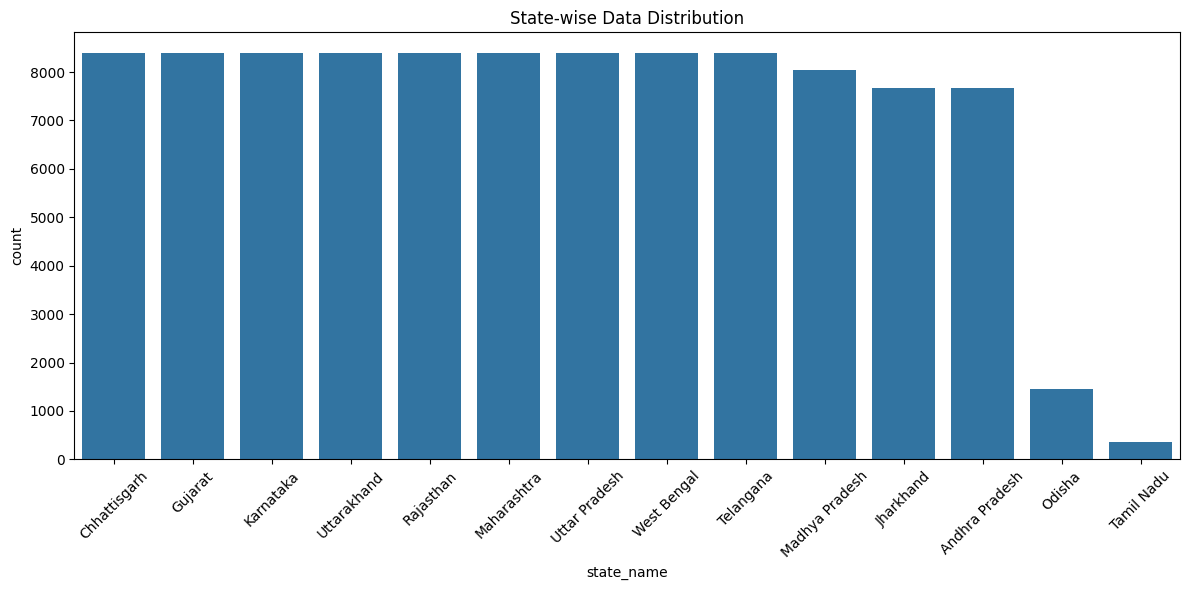

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state_name', order=df['state_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title("State-wise Data Distribution")
plt.tight_layout()
plt.show()

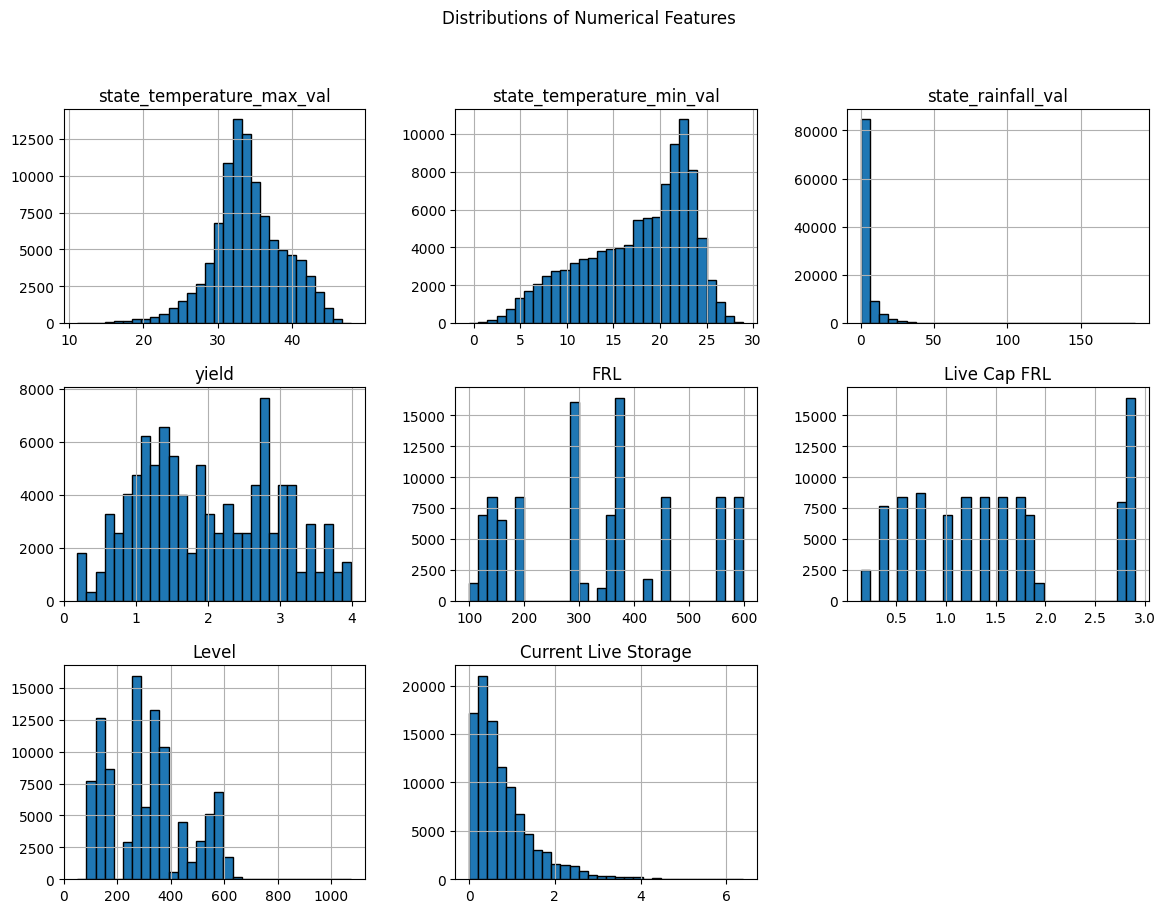

In [ ]:
numerical_cols = ['state_temperature_max_val', 'state_temperature_min_val', 'state_rainfall_val', 'yield', 'FRL', 'Live Cap FRL', 'Level', 'Current Live Storage']
df[numerical_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numerical Features")
plt.show()

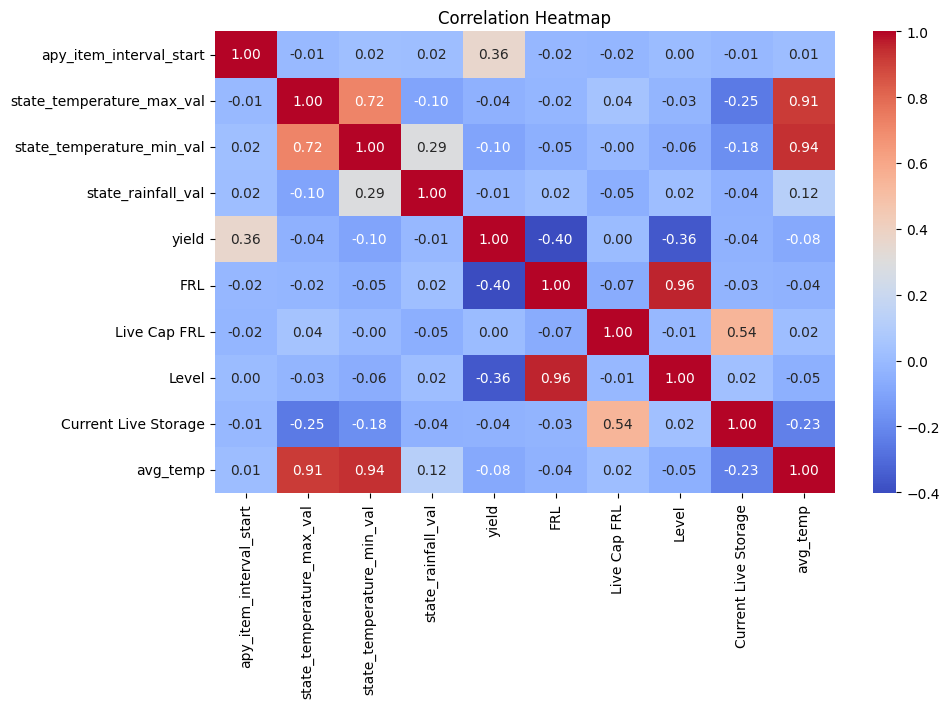

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

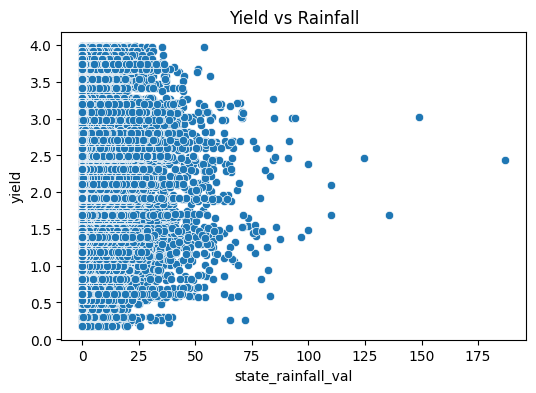

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='state_rainfall_val', y='yield')
plt.title("Yield vs Rainfall")
plt.show()

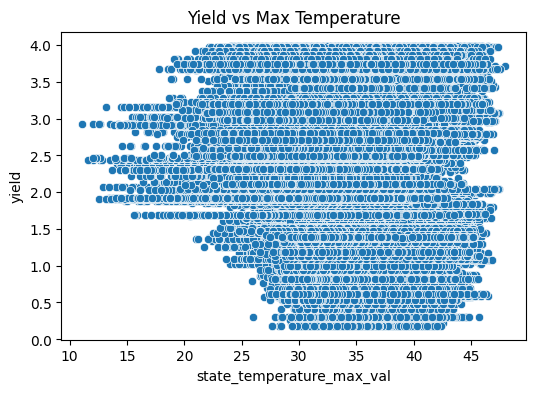

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='state_temperature_max_val', y='yield')
plt.title("Yield vs Max Temperature")
plt.show()

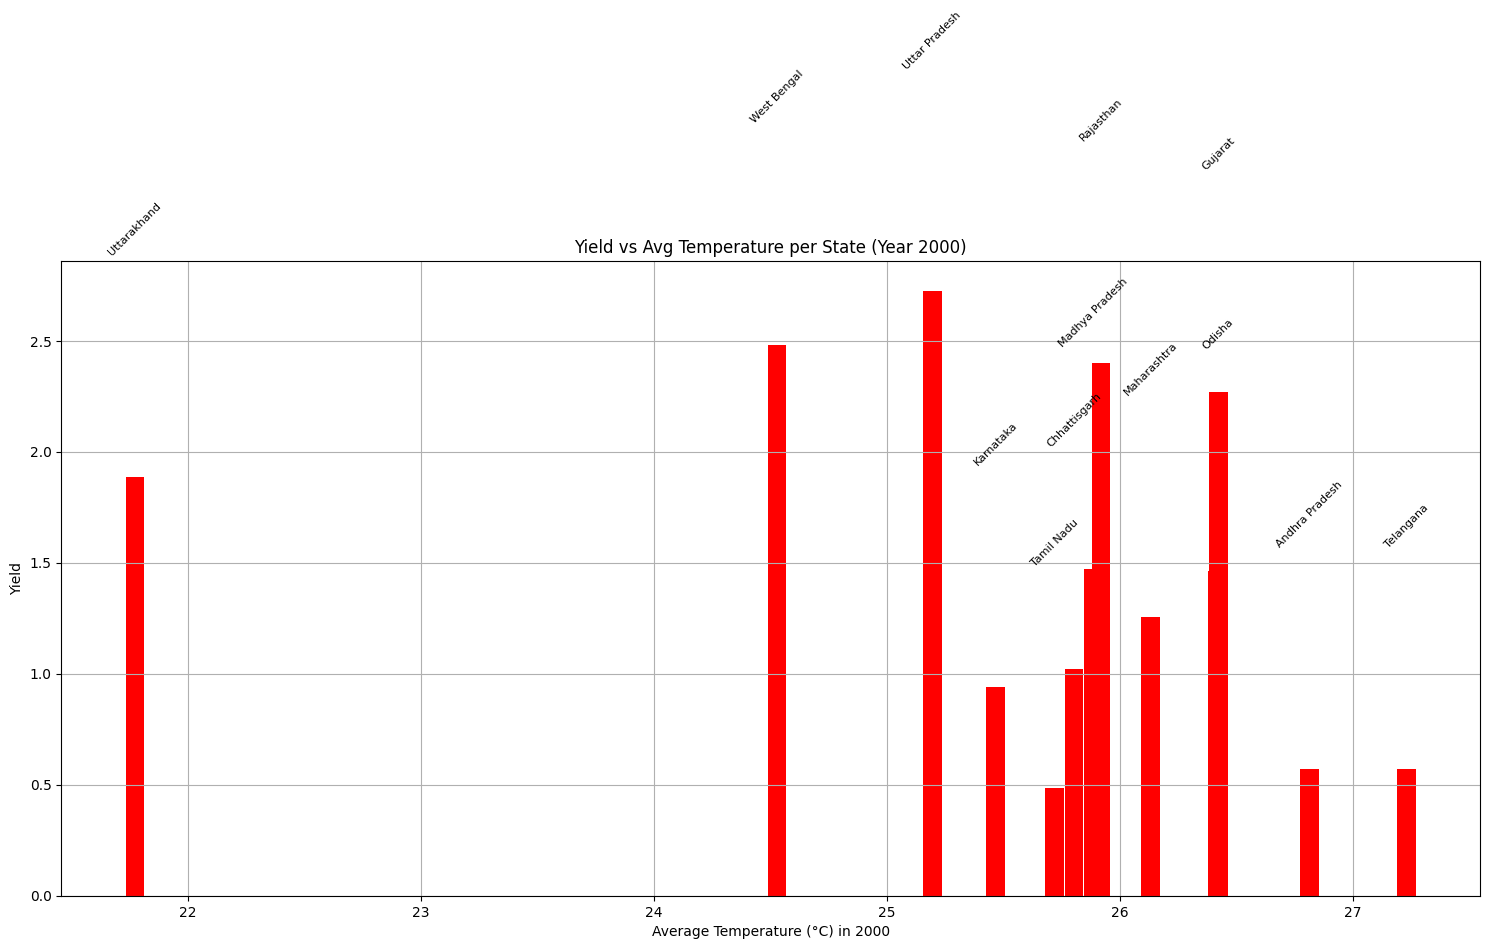

In [ ]:
df['avg_temp']=(df['state_temperature_max_val']+df['state_temperature_min_val'])/2

# Filter data for year 2000
df_2000 = df[df['apy_item_interval_start'] == 2000].copy()

# Calculate average temperature
df_2000['avg_temp'] = (df_2000['state_temperature_max_val'] + df_2000['state_temperature_min_val']) / 2

# Drop rows with missing values
df_2000 = df_2000[['state_name', 'avg_temp', 'yield']].dropna()

# Optional: group by state in case of duplicates, and take mean
df_grouped = df_2000.groupby('state_name', as_index=False).mean()

# Plot
plt.figure(figsize=(15, 10))
plt.bar(df_grouped['avg_temp'], df_grouped['yield'], width=0.08, color='red')

# Annotate state names
for i in range(len(df_grouped)):
    plt.text(df_grouped['avg_temp'].iloc[i], df_grouped['yield'].iloc[i] + 1,
             df_grouped['state_name'].iloc[i], rotation=45, ha='center', fontsize=8)

plt.xlabel('Average Temperature (°C) in 2000')
plt.ylabel('Yield')
plt.title('Yield vs Avg Temperature per State (Year 2000)')
plt.grid(True)
plt.tight_layout()
plt.show()

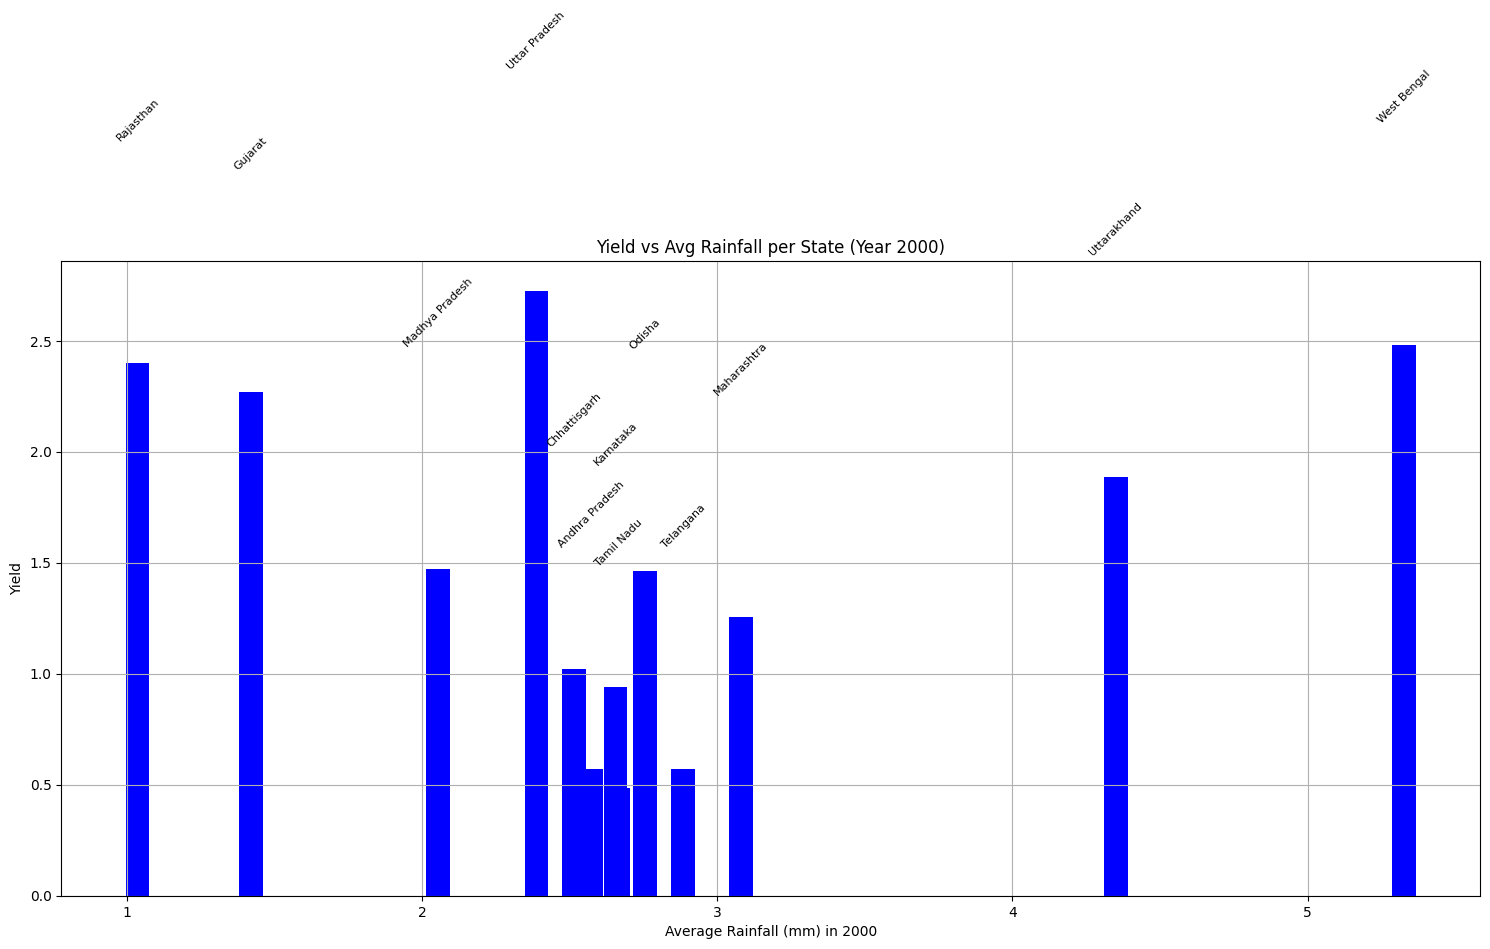

In [ ]:
# Filter data for year 2000
df_2000 = df[df['apy_item_interval_start'] == 2000].copy()

# Drop rows with missing values
df_2000 = df_2000[['state_name', 'state_rainfall_val', 'yield']].dropna()

# Group by state to get average rainfall and yield per state
df_grouped = df_2000.groupby('state_name', as_index=False).mean()

# Plot
plt.figure(figsize=(15, 10))
plt.bar(df_grouped['state_rainfall_val'], df_grouped['yield'], width=0.08, color='blue')

# Annotate state names
for i in range(len(df_grouped)):
    plt.text(df_grouped['state_rainfall_val'].iloc[i], df_grouped['yield'].iloc[i] + 1,
             df_grouped['state_name'].iloc[i], rotation=45, ha='center', fontsize=8)

plt.xlabel('Average Rainfall (mm) in 2000')
plt.ylabel('Yield')
plt.title('Yield vs Avg Rainfall per State (Year 2000)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Clean all column names first
df_2000.columns = df_2000.columns.str.strip()

# Check column names to verify correct names
print(df_2000.columns.tolist())

['state_name', 'state_rainfall_val', 'yield']


In [ ]:
# Filter data for year 2000
df_2000 = df[df['apy_item_interval_start'] == 2000].copy()

# Calculate average temperature
df_2000['avg_temp'] = (df_2000['state_temperature_max_val'] + df_2000['state_temperature_min_val']) / 2

# Group by state to get average values
df_grouped = df_2000.groupby('state_name', as_index=False).agg({
    'avg_temp': 'mean',
    'yield': 'mean',
    'state_rainfall_val': 'mean'
})

print(df_2000.columns.tolist())

['state_name', 'crop_name', 'apy_item_interval_start', 'temperature_recorded_date', 'state_temperature_max_val', 'state_temperature_min_val', 'state_rainfall_val', 'yield', 'FRL', 'Live Cap FRL', 'Level', 'Current Live Storage', 'avg_temp']


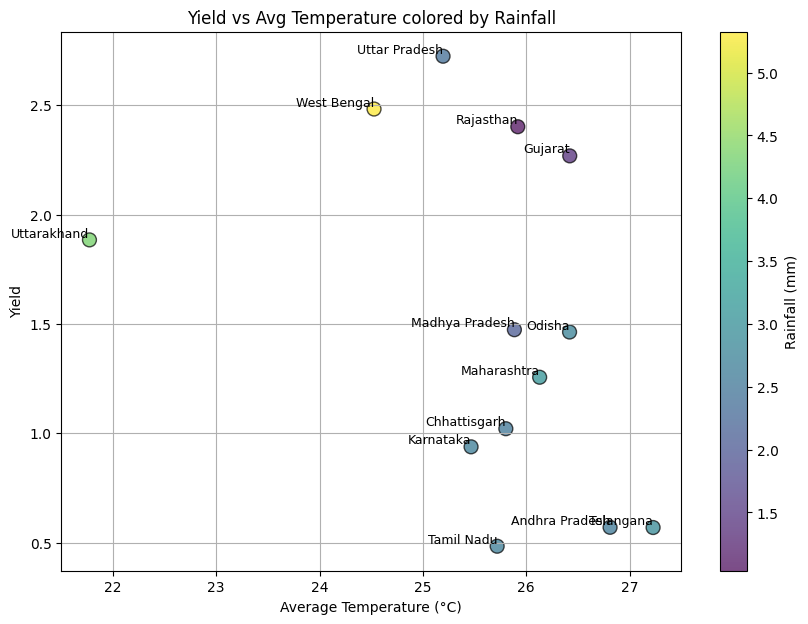

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df_grouped['avg_temp'],
    df_grouped['yield'],
    c=df_grouped['state_rainfall_val'],
    cmap='viridis',
    s=100,
    alpha=0.7,
    edgecolors='black'
)
plt.colorbar(scatter, label='Rainfall (mm)')
plt.title('Yield vs Avg Temperature colored by Rainfall')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield')
plt.grid(True)

# Add state labels near points
for i, state in enumerate(df_grouped['state_name']):
    plt.text(
        df_grouped['avg_temp'].iloc[i],
        df_grouped['yield'].iloc[i],
        state,
        fontsize=9,
        ha='right',
        va='bottom'
    )

plt.show()

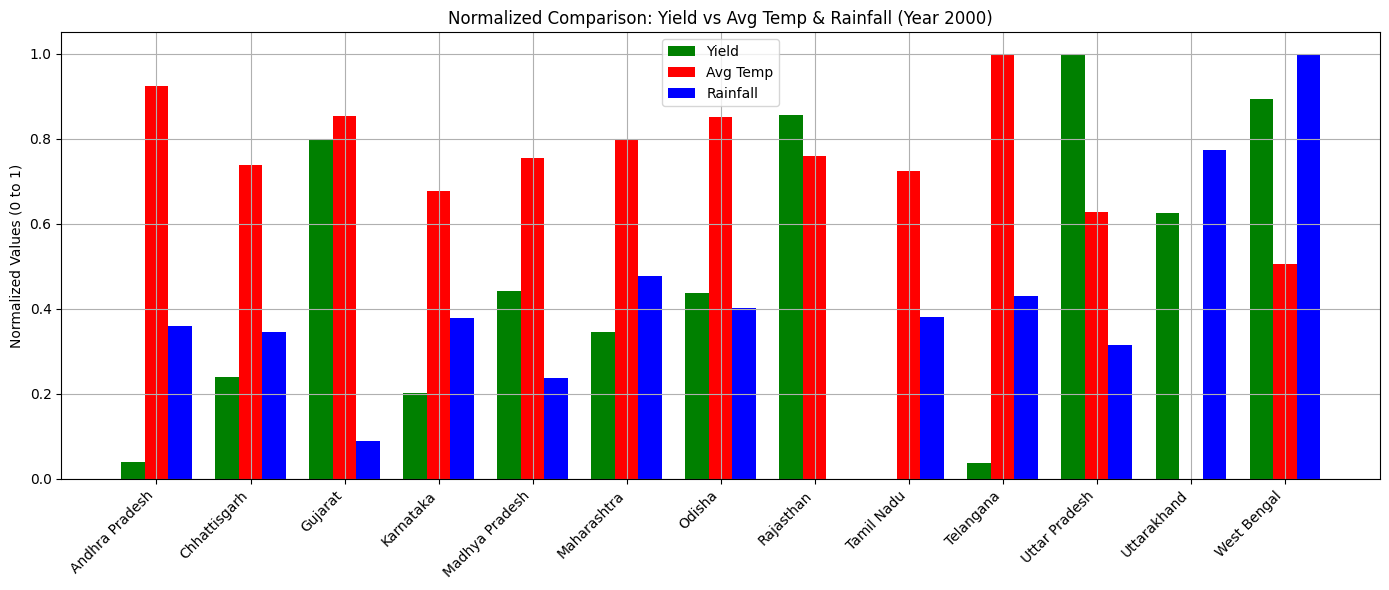

In [ ]:
# Normalize values (0 to 1)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_grouped['yield_norm'] = normalize(df_grouped['yield'])
df_grouped['temp_norm'] = normalize(df_grouped['avg_temp'])
df_grouped['rainfall_norm'] = normalize(df_grouped['state_rainfall_val'])

# Bar plot
states = df_grouped['state_name']
x = np.arange(len(states))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, df_grouped['yield_norm'], width=width, label='Yield', color='green')
plt.bar(x, df_grouped['temp_norm'], width=width, label='Avg Temp', color='red')
plt.bar(x + width, df_grouped['rainfall_norm'], width=width, label='Rainfall', color='blue')

plt.xticks(x, states, rotation=45, ha='right')
plt.ylabel('Normalized Values (0 to 1)')
plt.title('Normalized Comparison: Yield vs Avg Temp & Rainfall (Year 2000)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

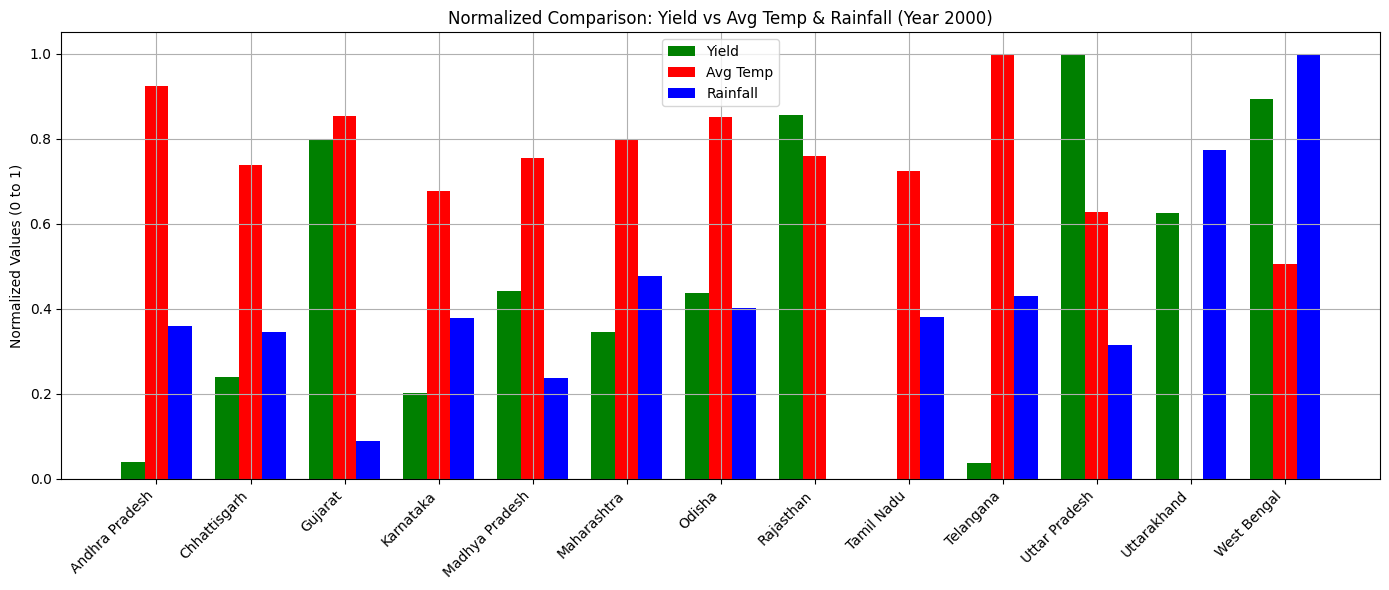

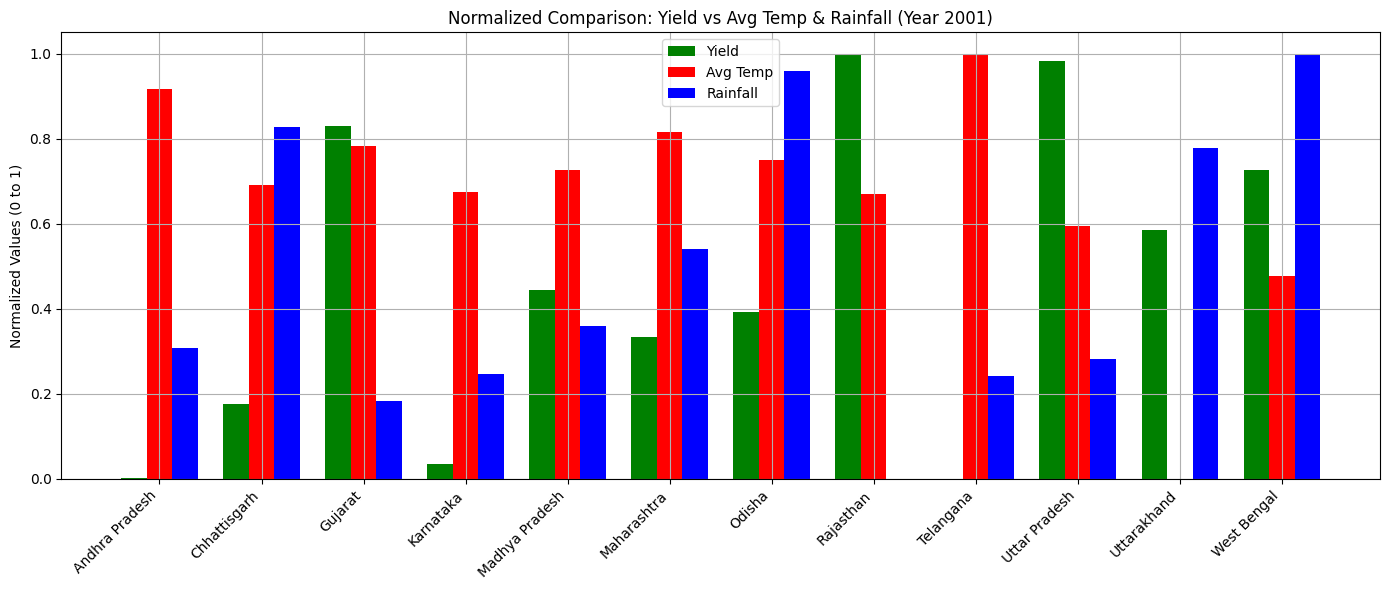

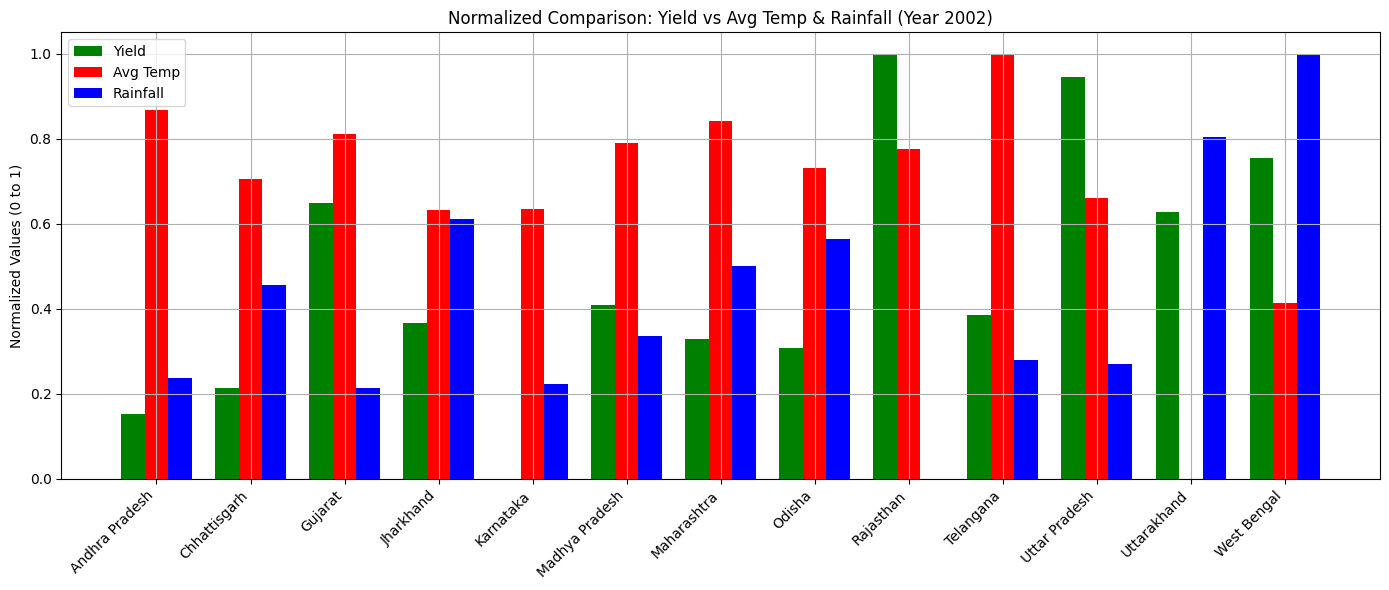

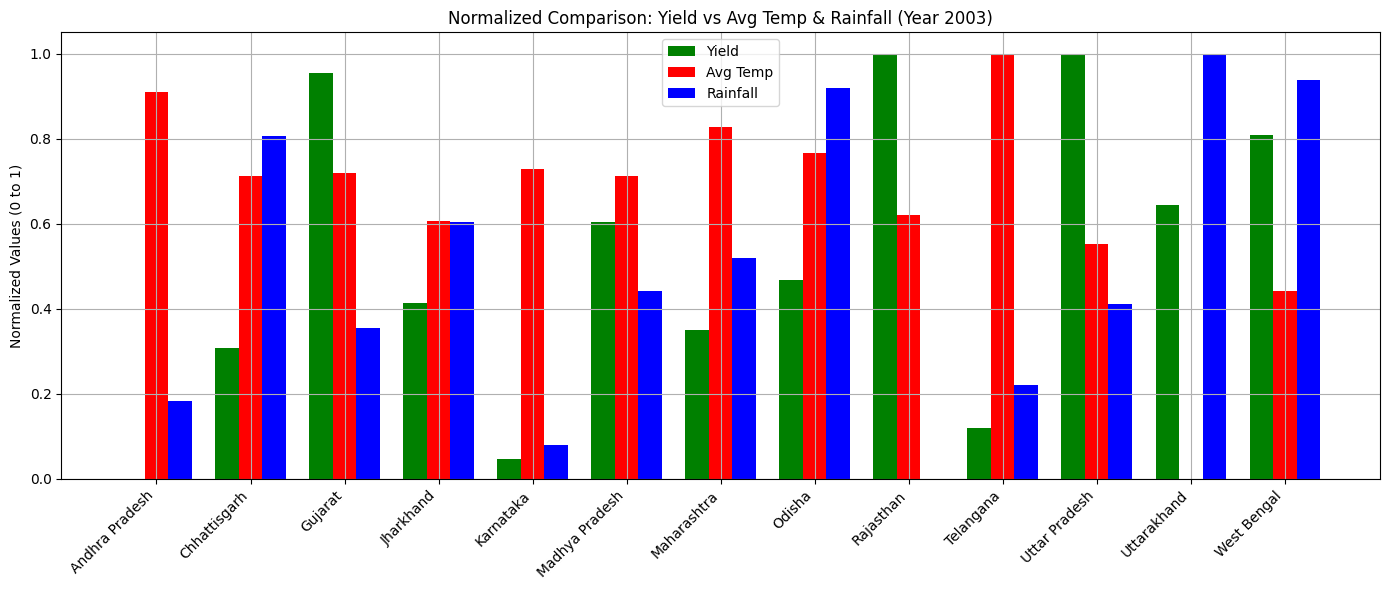

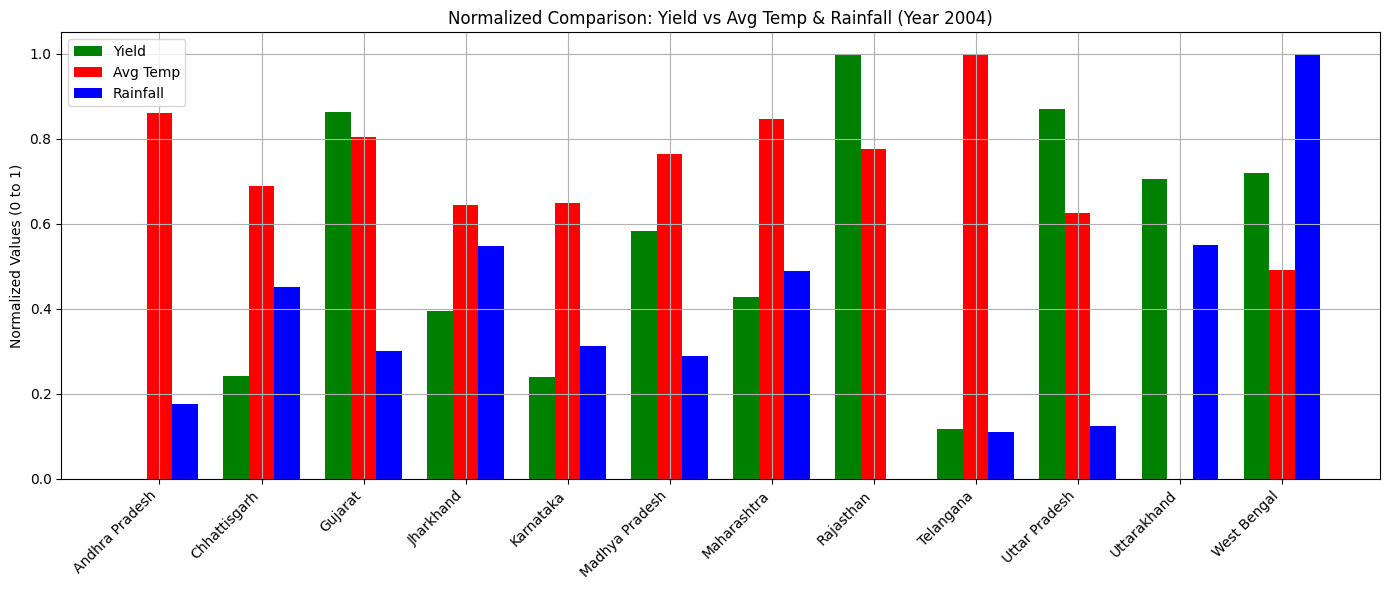

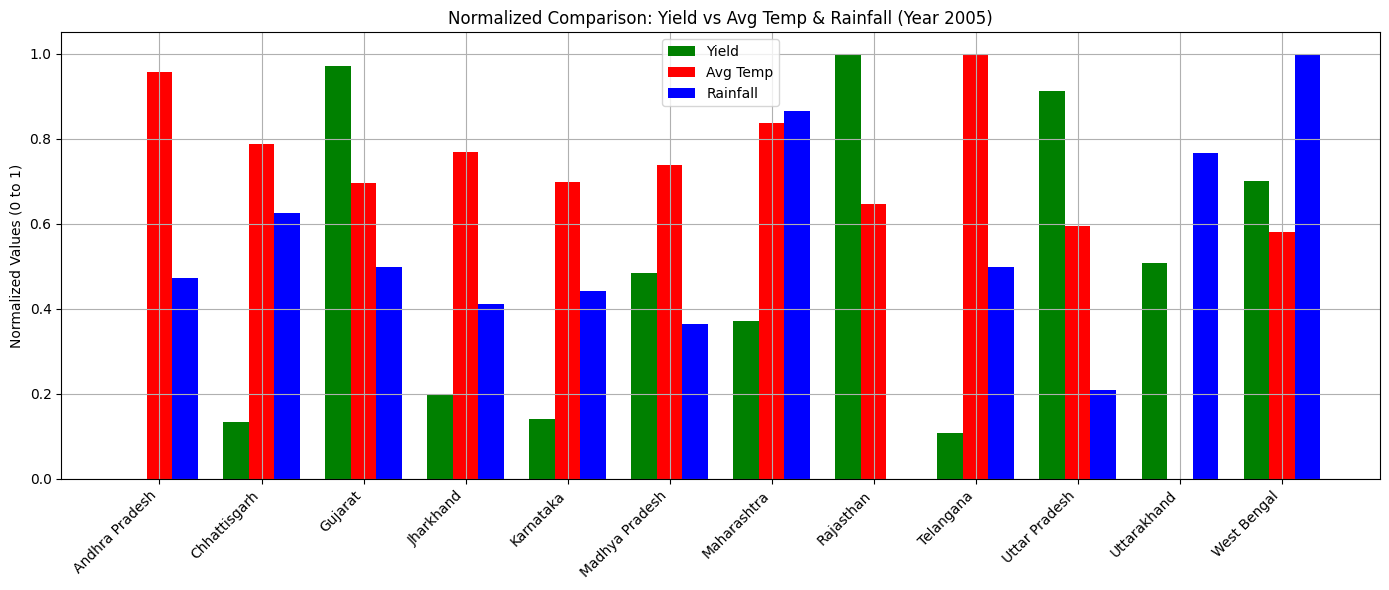

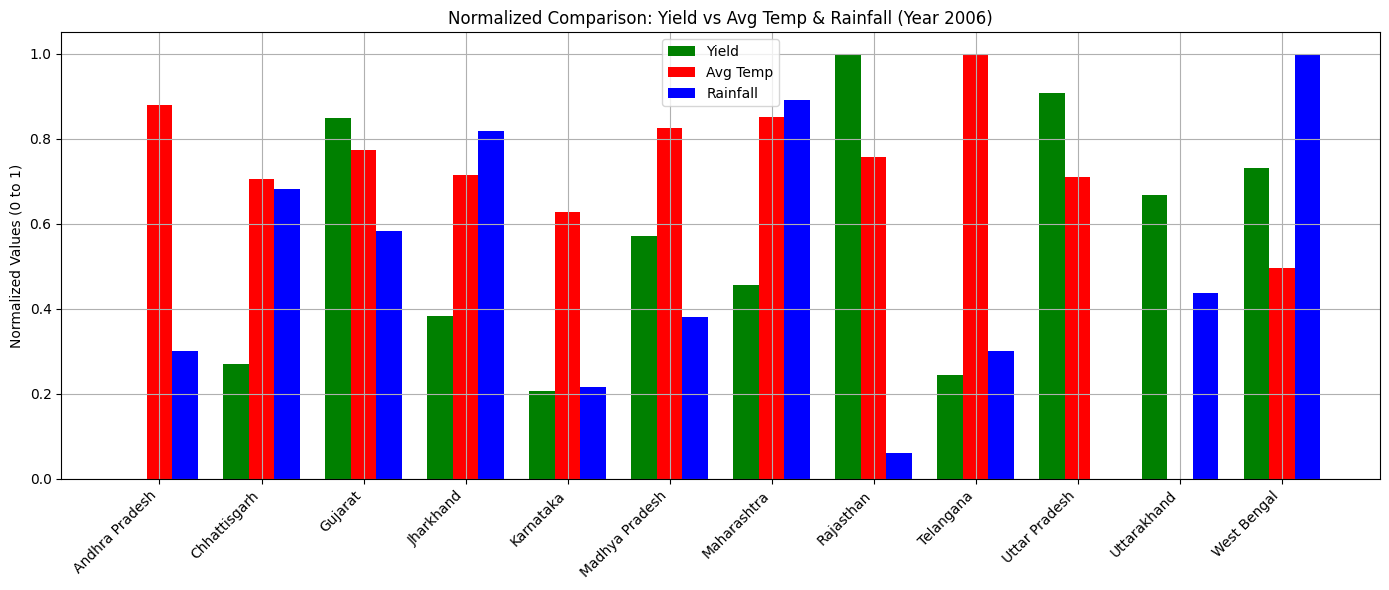

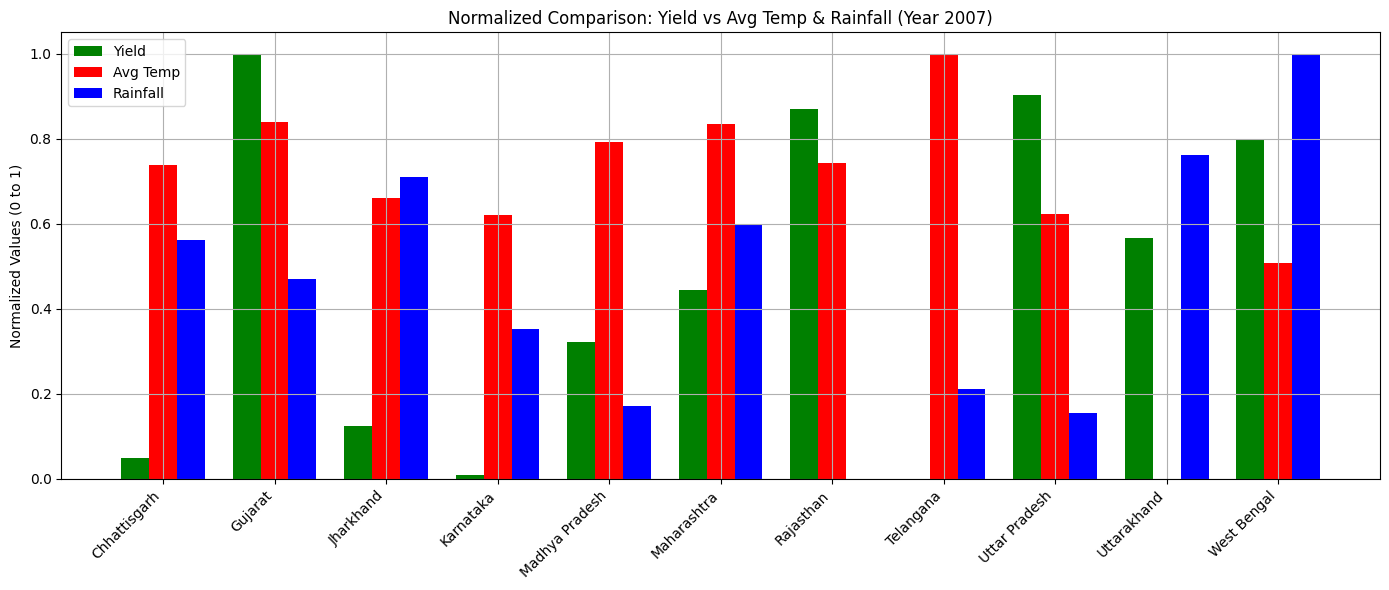

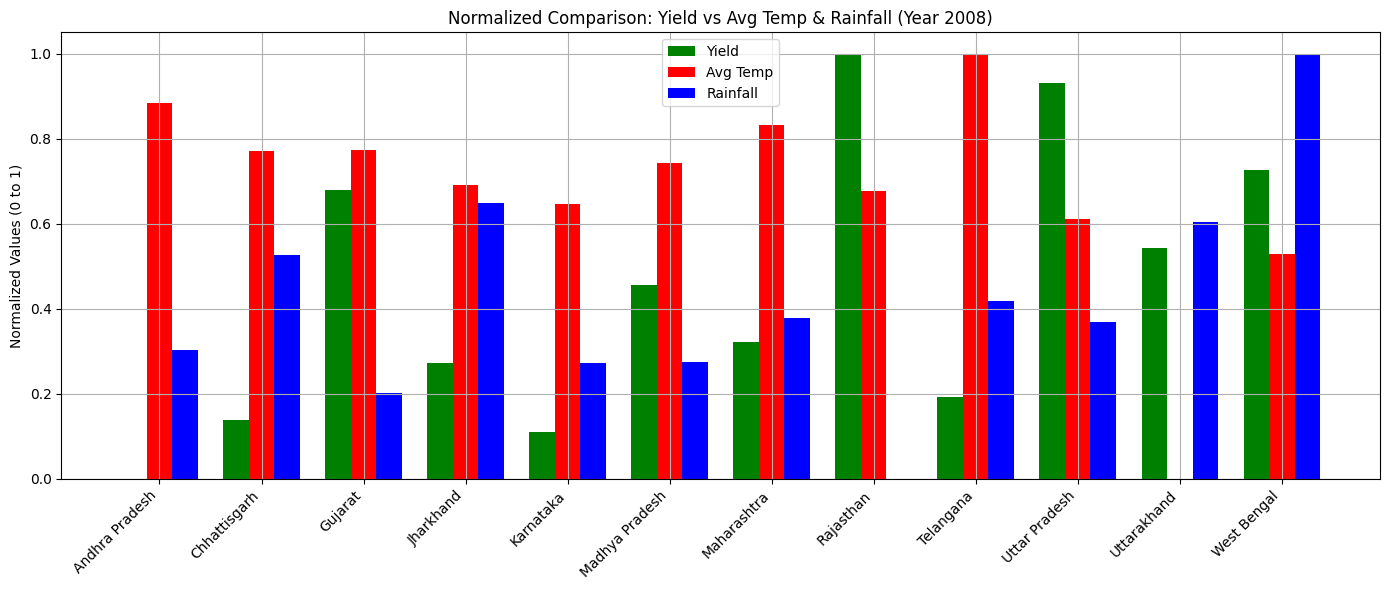

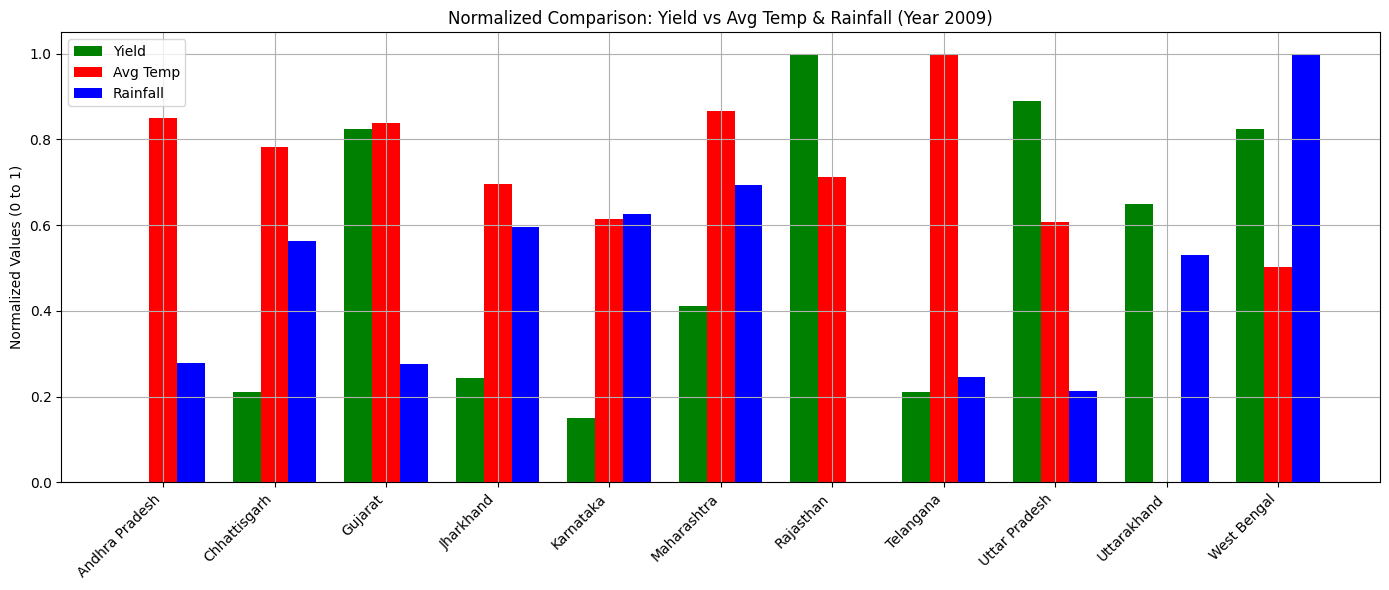

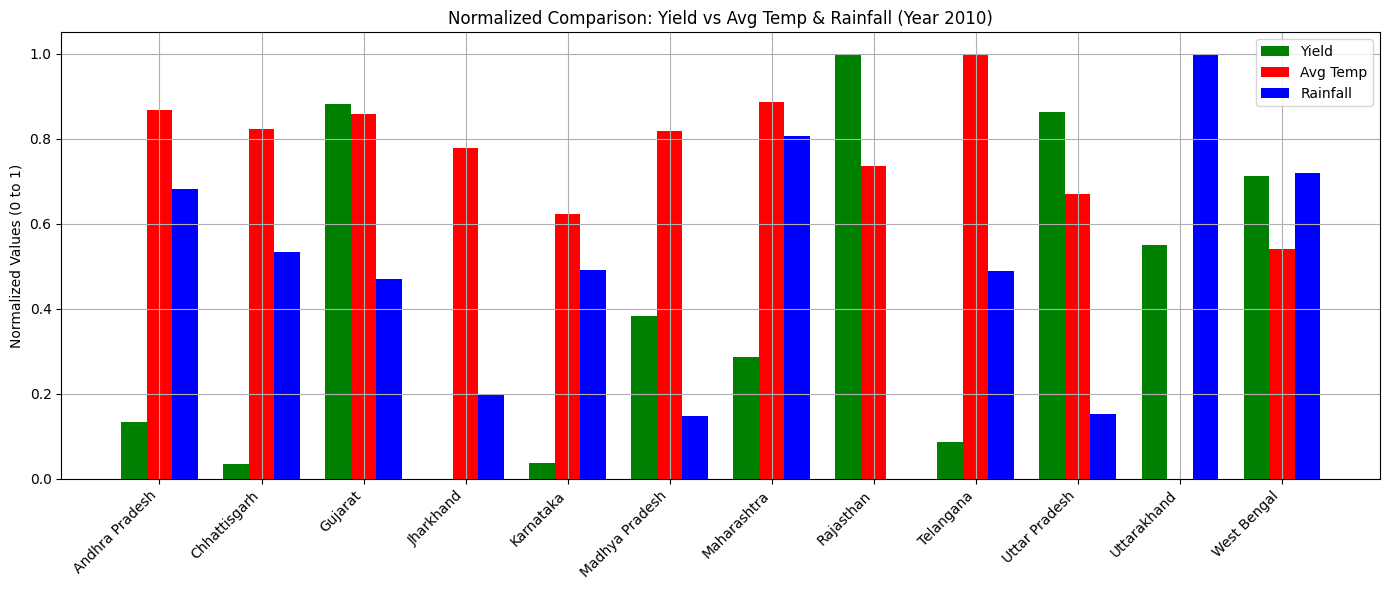

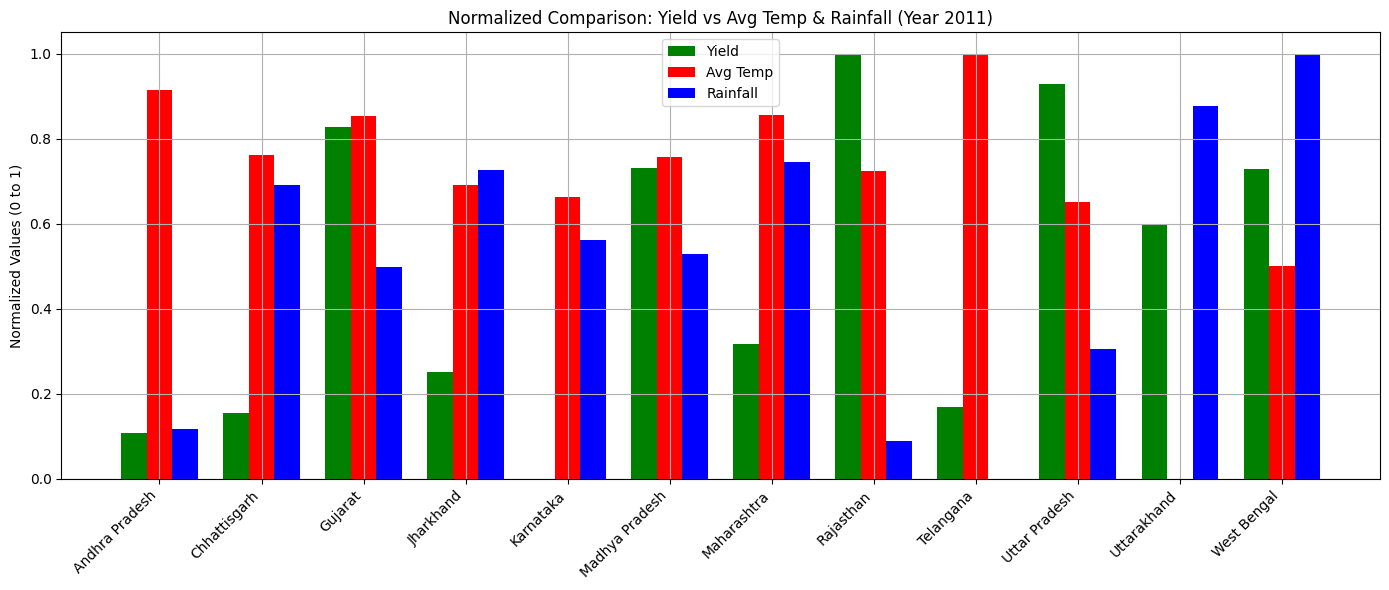

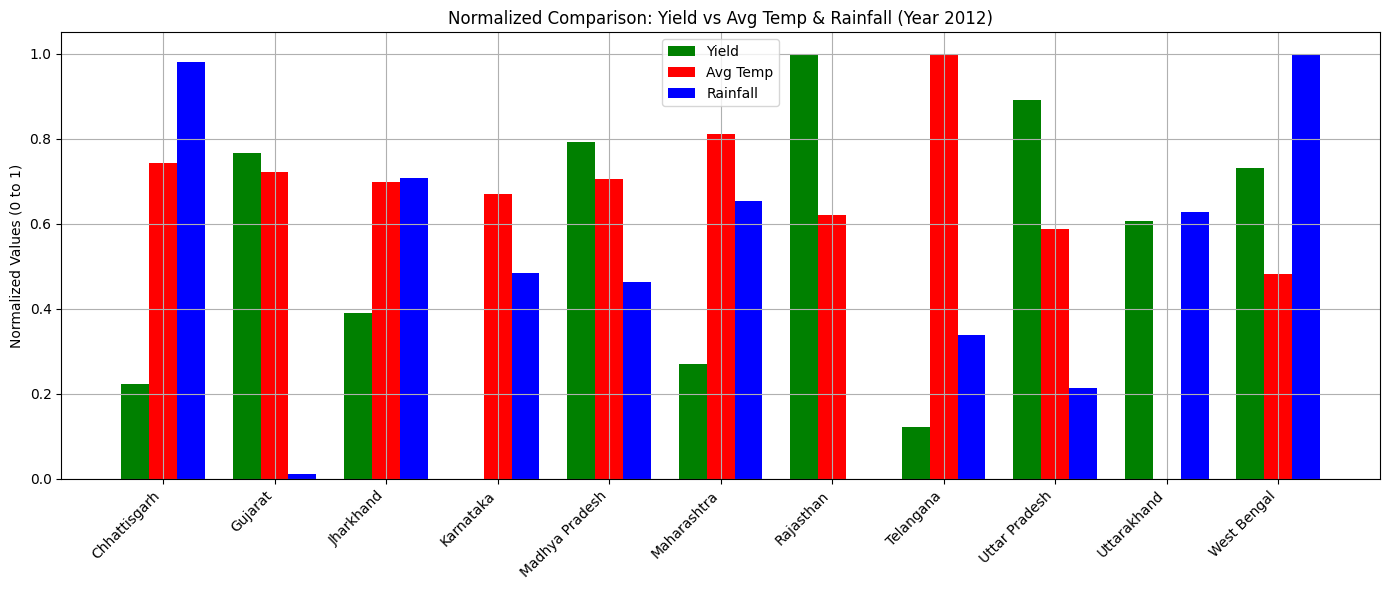

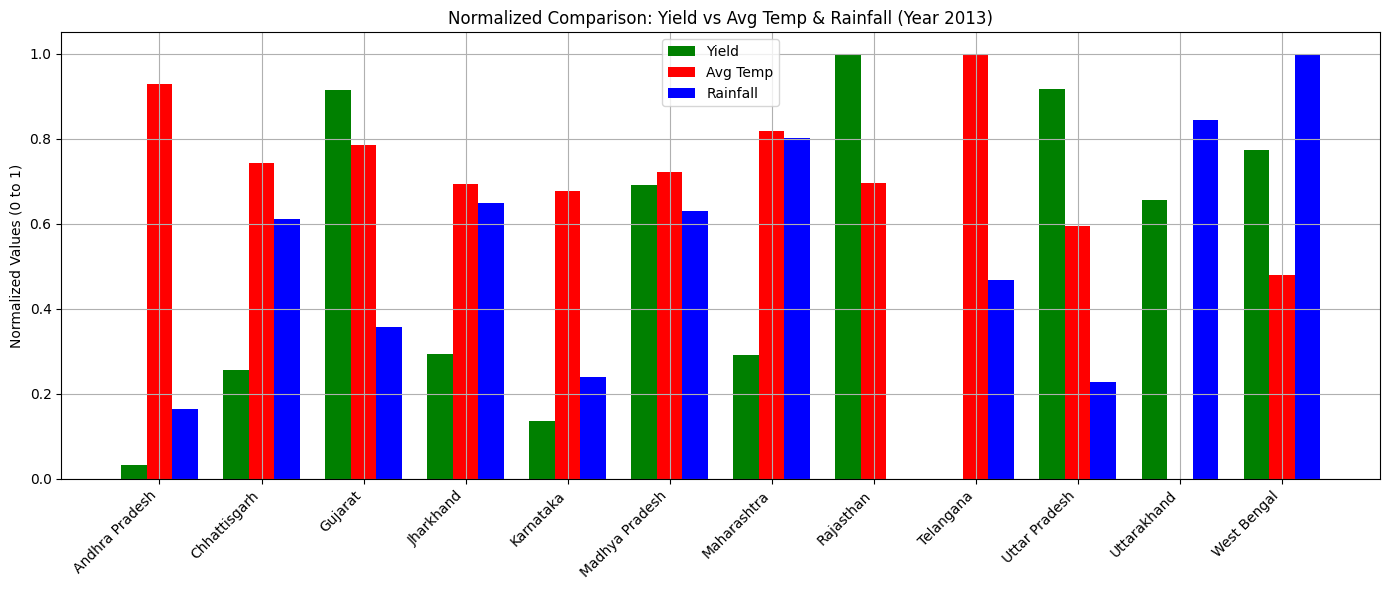

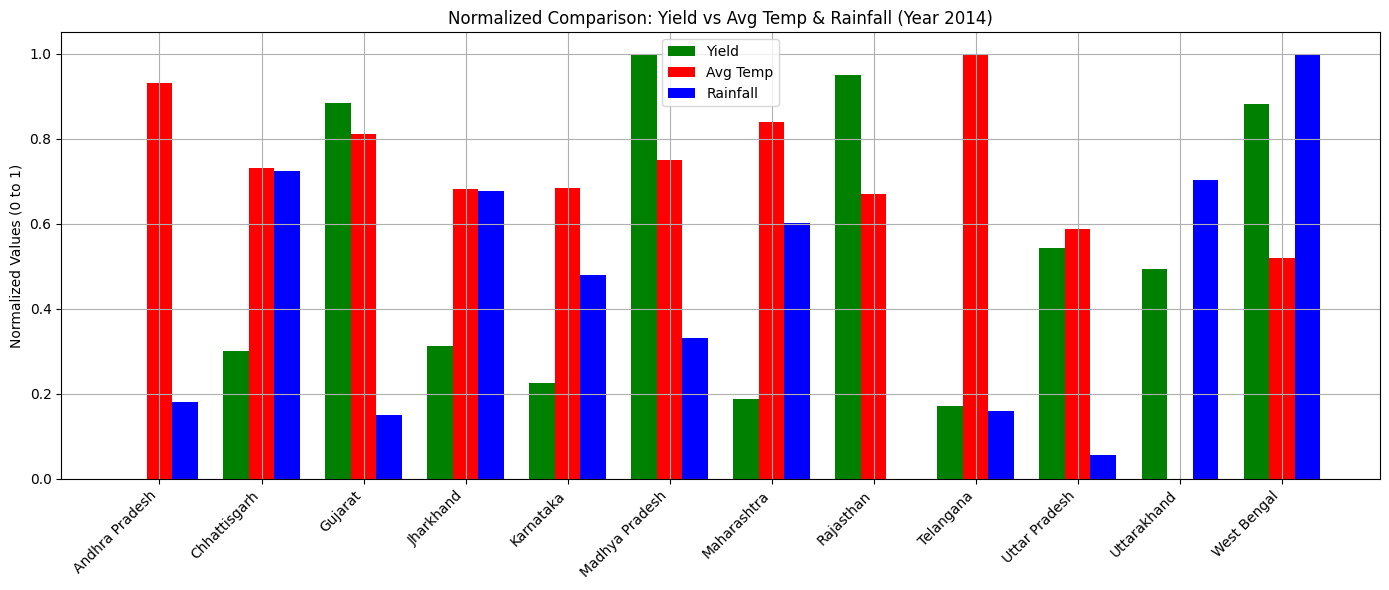

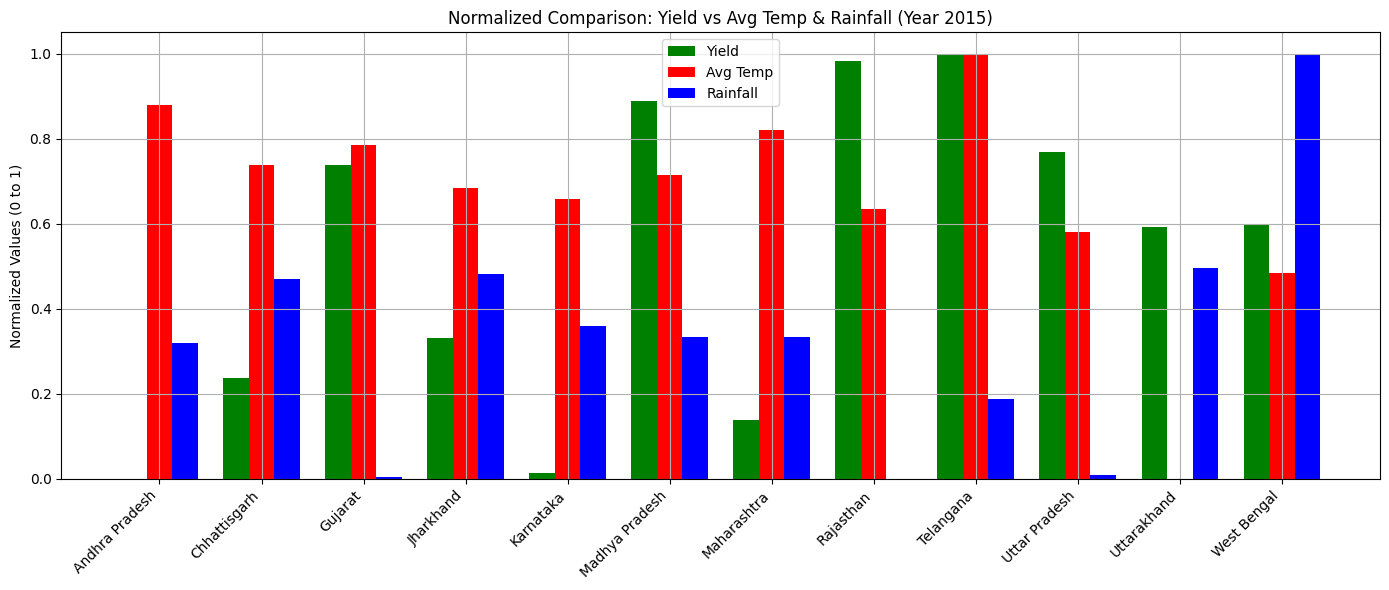

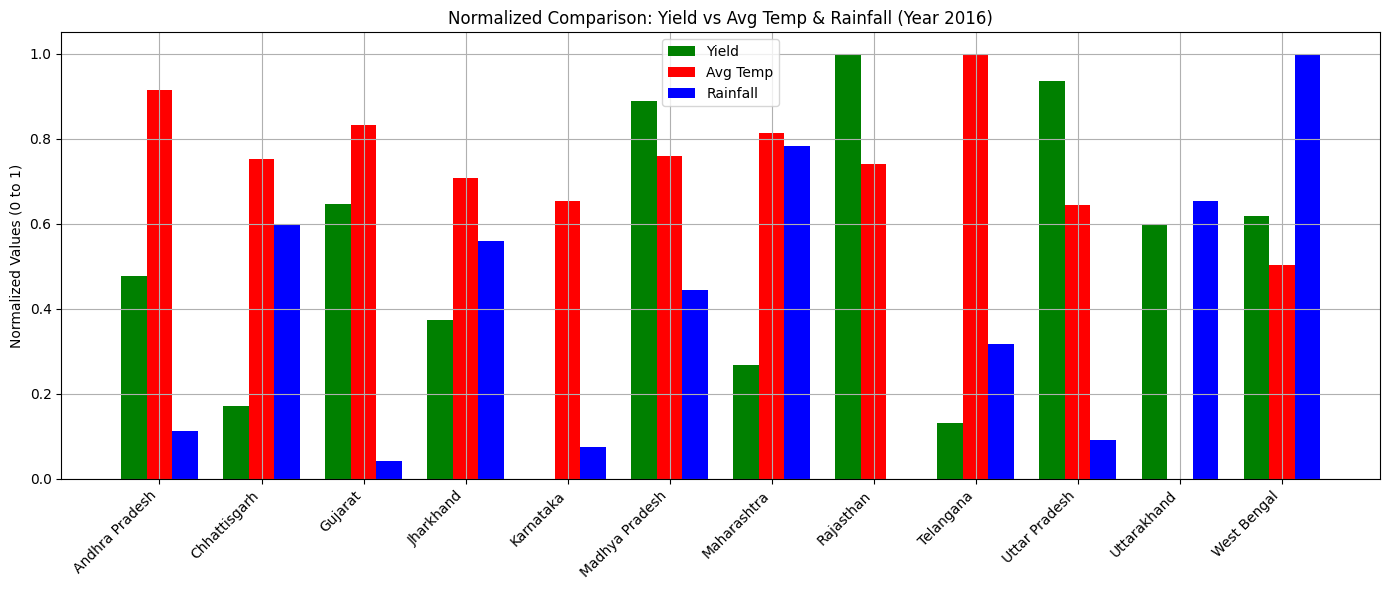

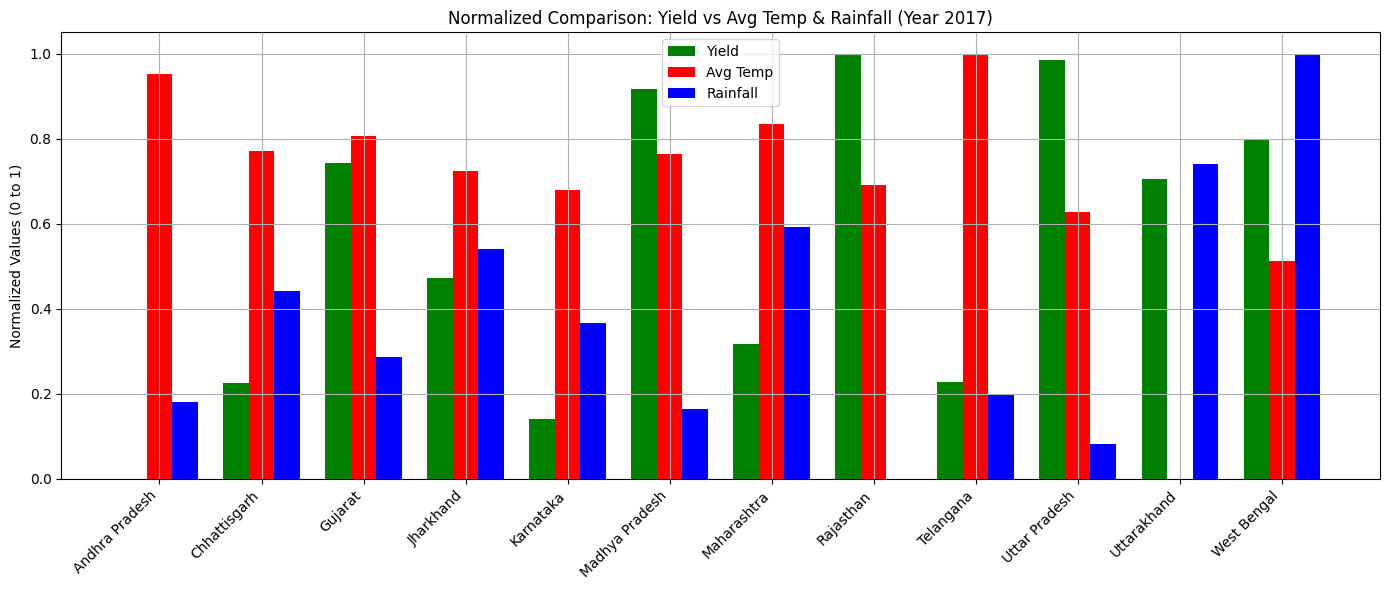

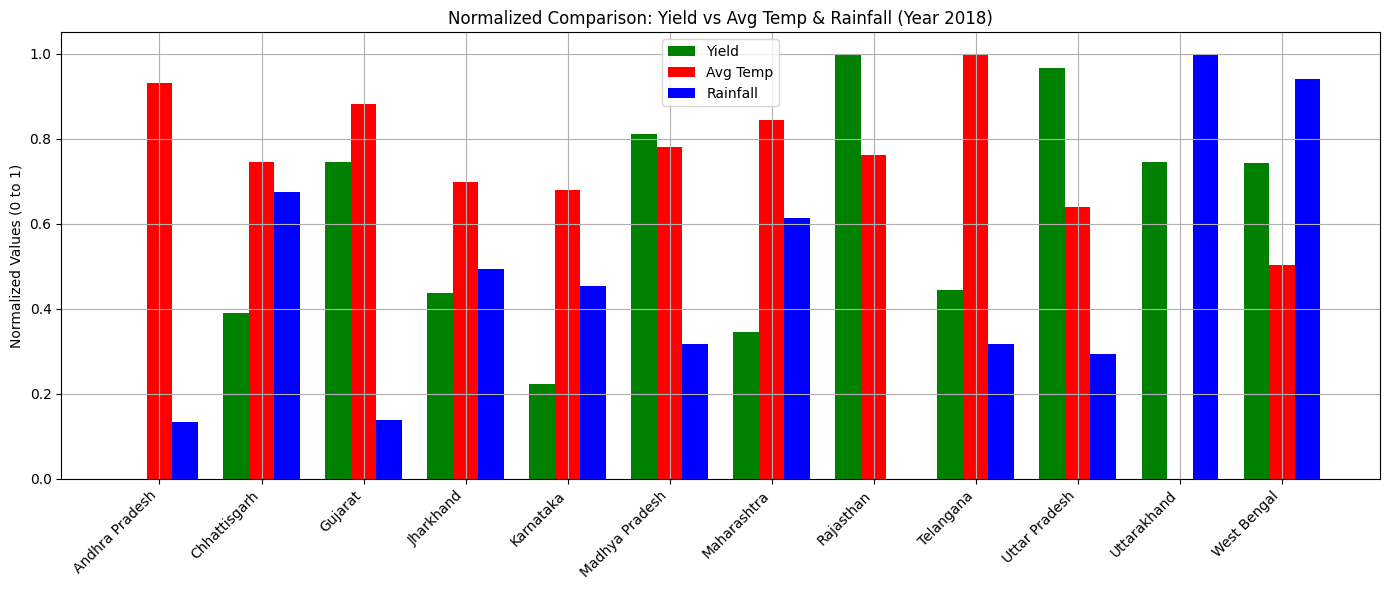

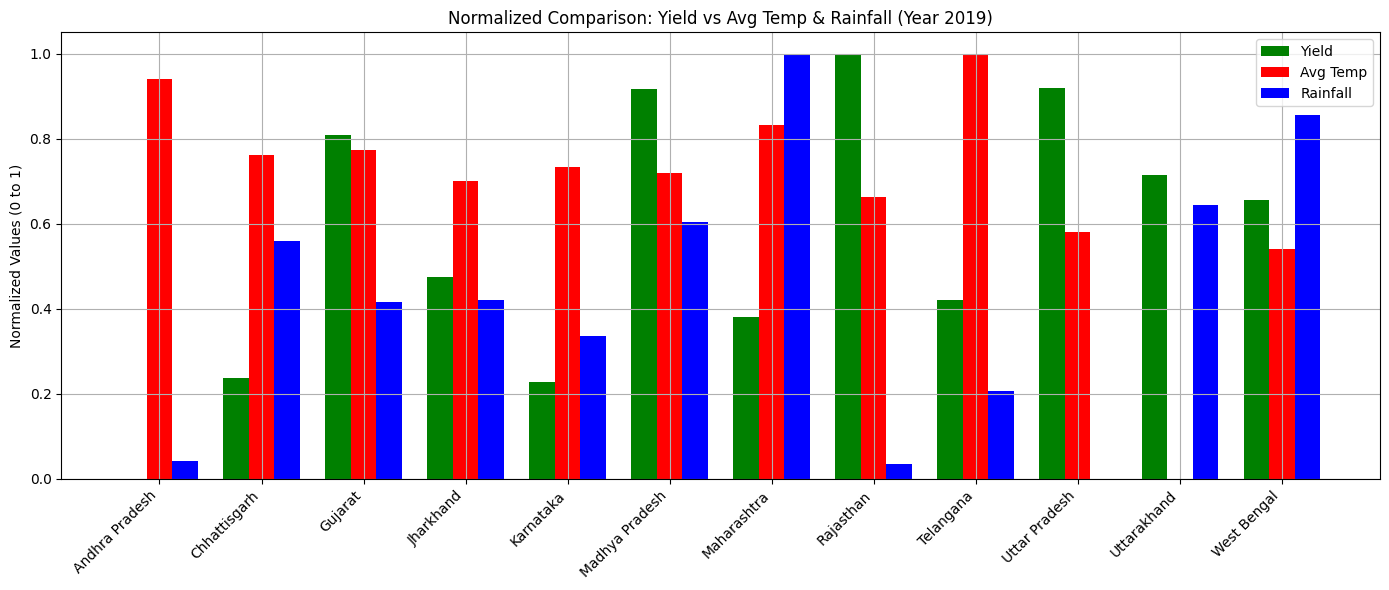

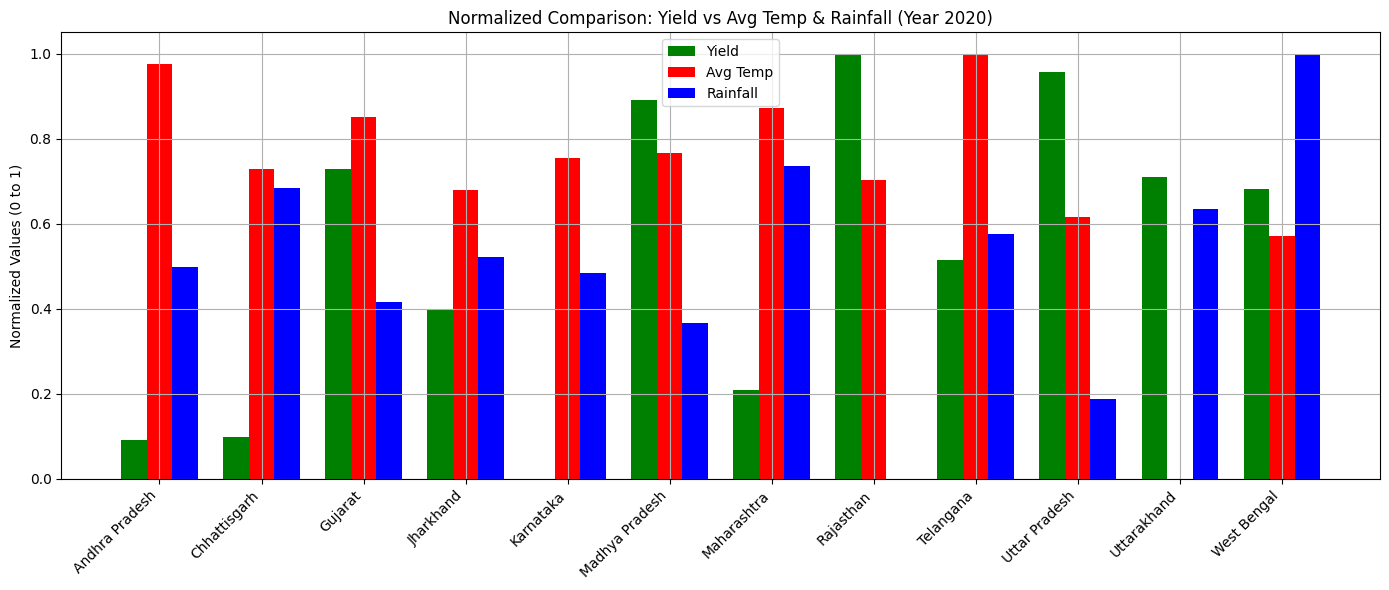

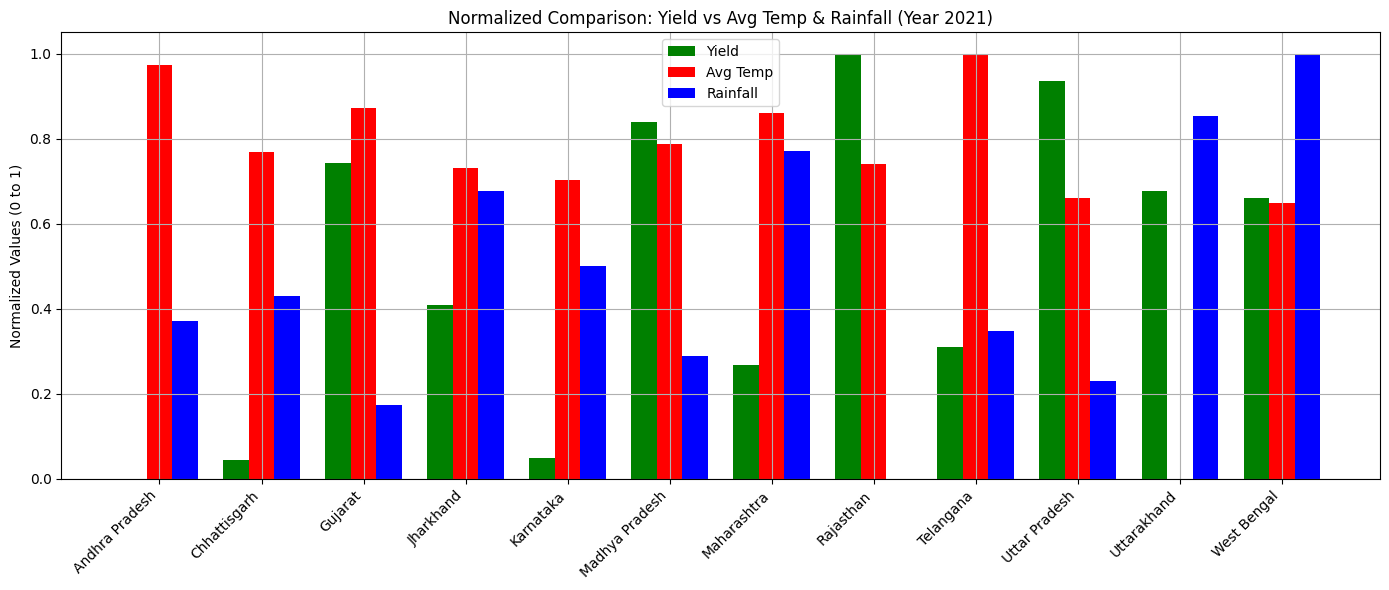

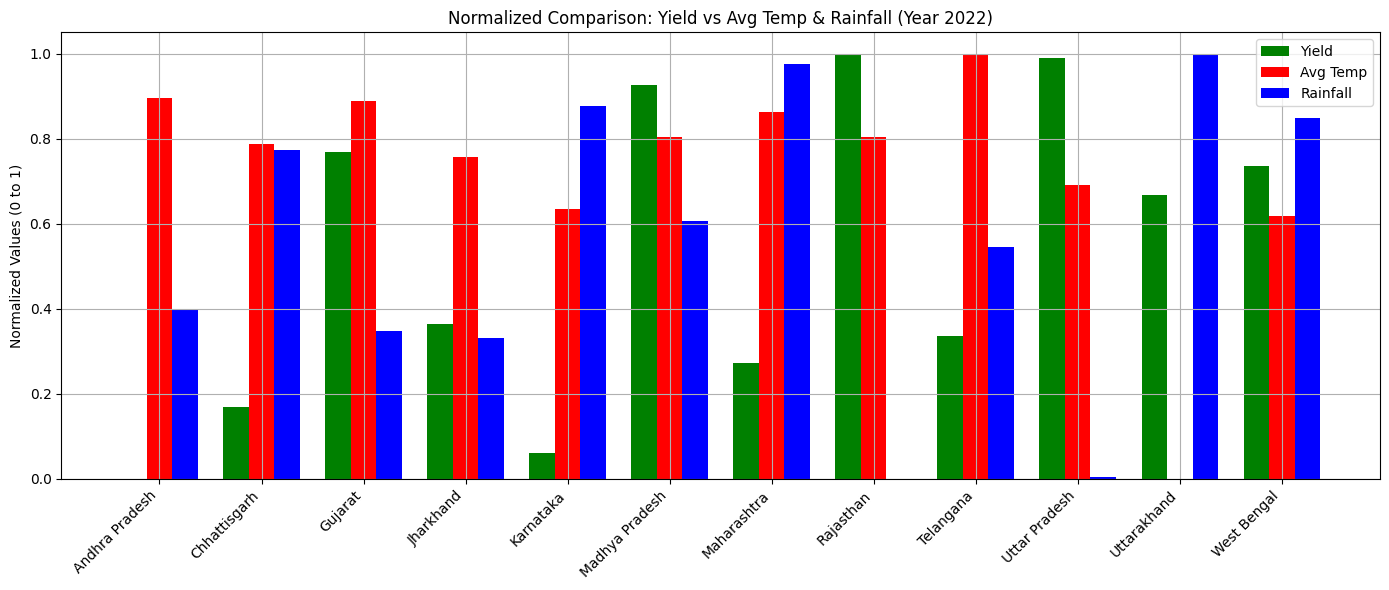

In [ ]:
# Load the dataframe if it's not already loaded
try:
    df.head()
except NameError:
    import pandas as pd
    df=pd.read_excel('merged_wheat_reservoir.xlsx')

# Filter for years 2000 to 2022
df_decade = df[(df['apy_item_interval_start'] >= 2000) &
                    (df['apy_item_interval_start'] <= 2022)].copy()

# Compute avg temp
df_decade['avg_temp'] = (df_decade['state_temperature_max_val'] + df_decade['state_temperature_min_val']) / 2

# Drop NA
df_decade = df_decade[['state_name', 'apy_item_interval_start', 'yield', 'avg_temp', 'state_rainfall_val']].dropna()

# Group by state and year
df_grouped = df_decade.groupby(['state_name', 'apy_item_interval_start'], as_index=False).mean()

# Normalize function
def normalize(col): return (col - col.min()) / (col.max() - col.min())

# Plot for each year
years = sorted(df_grouped['apy_item_interval_start'].unique())
for year in years:
    df_year = df_grouped[df_grouped['apy_item_interval_start'] == year].copy()
    df_year['yield_norm'] = normalize(df_year['yield'])
    df_year['temp_norm'] = normalize(df_year['avg_temp'])
    df_year['rainfall_norm'] = normalize(df_year['state_rainfall_val'])

    x = np.arange(len(df_year))
    width = 0.25

    plt.figure(figsize=(14, 6))
    plt.bar(x - width, df_year['yield_norm'], width=width, label='Yield', color='green')
    plt.bar(x, df_year['temp_norm'], width=width, label='Avg Temp', color='red')
    plt.bar(x + width, df_year['rainfall_norm'], width=width, label='Rainfall', color='blue')

    plt.xticks(x, df_year['state_name'], rotation=45, ha='right')
    plt.ylabel('Normalized Values (0 to 1)')
    plt.title(f'Normalized Comparison: Yield vs Avg Temp & Rainfall (Year {year})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

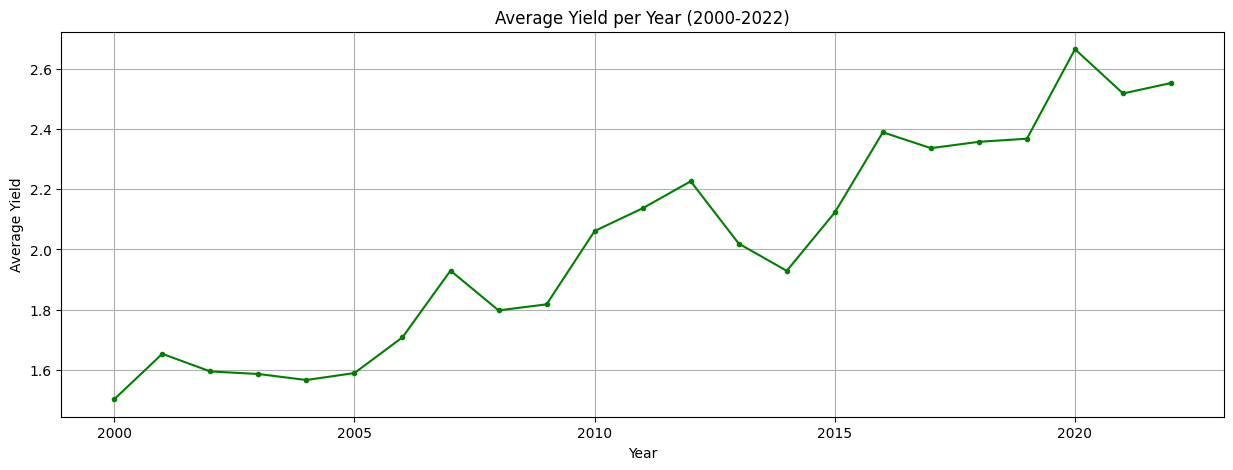

In [ ]:
# Group by year and calculate mean yield
yield_per_year = df_decade.groupby('apy_item_interval_start')['yield'].mean().reset_index()

# Plot
plt.figure(figsize=(15, 5))
plt.plot(yield_per_year['apy_item_interval_start'], yield_per_year['yield'], marker='.', color='green')
plt.title('Average Yield per Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.show()

In [ ]:
df_grouped.head()

,state_name,apy_item_interval_start,yield,avg_temp,state_rainfall_val
0,Andhra Pradesh,2000,0.57038,26.811639,2.573852
1,Andhra Pradesh,2001,0.69122,27.066644,2.517397
2,Andhra Pradesh,2002,0.92275,27.075370,1.793342
3,Andhra Pradesh,2003,0.29723,27.399452,2.280904
4,Andhra Pradesh,2004,0.22307,26.677186,2.149973


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# 1. Clean column names
df.columns = df.columns.str.strip()

# 2. Group by state and year, taking mean of numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df_grouped = df.groupby(['state_name', 'apy_item_interval_start'], as_index=False)[numeric_cols].mean()

# 3. Create average temperature column
df_grouped['avg_temp'] = (df_grouped['state_temperature_max_val'] + df_grouped['state_temperature_min_val']) / 2

# 4. Drop rows with missing critical values
df_grouped= df_grouped.dropna(subset=['state_rainfall_val', 'state_temperature_min_val','FRL', 'Current Live Storage', 'yield'])

state_ohe = pd.get_dummies(df_grouped['state_name'], prefix='state')#One-hot Encoding, Not using for now
# Mean target encoding
# 1.1. Split data first
train_df, test_df = train_test_split(df_grouped, test_size=0.2, random_state=42)

# 1.2. Compute mean yield per state *only on training data*
state_mean = train_df.groupby('state_name')['yield'].mean()

# 1.3. Map it to both train and test
train_df['state_encoded'] = train_df['state_name'].map(state_mean)
test_df['state_encoded'] = test_df['state_name'].map(state_mean)
# 5. Prepare features and target
feature_cols = ['state_encoded','state_temperature_min_val', 'state_rainfall_val','apy_item_interval_start','FRL', 'Current Live Storage' ]

X_train = train_df[feature_cols]
y_train = train_df['yield']

X_test = test_df[feature_cols]
y_test = test_df['yield']

# 7. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Build the ANN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# 9. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 10. Train the model
model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',patience=18,restore_best_weights=True)])

# 11. Evaluate model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 4.7957 - mae: 1.9153 - val_loss: 1.4028 - val_mae: 0.9260
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4282 - mae: 0.9669 - val_loss: 0.5537 - val_mae: 0.6031
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7170 - mae: 0.6928 - val_loss: 0.3488 - val_mae: 0.4522
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4177 - mae: 0.5080 - val_loss: 0.2571 - val_mae: 0.3693
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3880 - mae: 0.4912 - val_loss: 0.2478 - val_mae: 0.3582
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3496 - mae: 0.4507 - val_loss: 0.2279 - val_mae: 0.3425
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3729 - mae: 0.4598 - val_loss: 0.2083 - val_mae: 0.3233
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3199 - mae: 0.4356 - val_loss: 0.1948 - val_mae: 0.3148
Epoch 9/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2647 - mae: 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()
# Train
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
# Test
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print("\nModel performance on Training set:")
print(f"- MAE: {train_mae:.4f}")
print(f"- RMSE: {train_rmse:.4f}")
print(f"- R² Score: {train_r2:.4f}")
print("------------------------------------")
print("\nModel performance on Test set:")
print(f"- MAE: {test_mae:.4f}")
print(f"- RMSE: {test_rmse:.4f}")
print(f"- R² Score: {test_r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
ANN Model performance on Training set:
- MAE: 0.1697
- RMSE: 0.2474
- R² Score: 0.9354
------------------------------------

ANN Model performance on Test set:
- MAE: 0.2156
- RMSE: 0.2828
- R² Score: 0.8785


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=69,max_depth=5, min_samples_split=10,min_samples_leaf=4)
rf.fit(X_train, y_train)

# Predict on train and test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Evaluate
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} performance:")
    print(f"- MAE: {mae:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- R² Score: {r2:.4f}")
evaluate_model("Random Forest - Training set", y_train, y_train_pred_rf)
evaluate_model("Random Forest - Test set", y_test, y_test_pred_rf)


Random Forest - Training set performance:
- MAE: 0.1499
- RMSE: 0.2316
- R² Score: 0.9434

Random Forest - Test set performance:
- MAE: 0.2208
- RMSE: 0.2983
- R² Score: 0.8648


In [ ]:
data_2023 = {
    'state_name': ['Andhra Pradesh', 'Chhattisgarh', 'Gujarat', 'Jharkhand', 'Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Odisha', 'Rajasthan', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
    'state_temperature_max_val': [35.5, 34.8, 36.1, 33.5, 34.2, 35.8, 36.5, 34.0, 35.0, 33.0, 35.2, 34.5, 30.0, 33.8],
    'state_temperature_min_val': [19.0, 18.5, 20.0, 17.5, 18.0, 19.5, 20.5, 18.0, 17.0, 16.0, 19.8, 17.0, 14.0, 17.5],
    'state_rainfall_val': [2.8, 3.5, 2.5, 3.0, 4.0, 2.2, 3.8, 4.5, 1.8, 5.0, 3.2, 2.0, 4.2, 4.8]
}
df_2023_climate = pd.DataFrame(data_2023)
df_2023_climate['predicted_year'] = 2023

# Calculate average temperature for 2023
df_2023_climate['avg_temp'] = (df_2023_climate['state_temperature_max_val'] + df_2023_climate['state_temperature_min_val']) / 2

# Apply the same state encoding used for training data
df_2023_climate['state_encoded'] = df_2023_climate['state_name'].map(state_mean)

# Preparing 2023 inputs
feature_cols = ['state_encoded','state_temperature_min_val', 'state_rainfall_val','avg_temp']

mean_apy_item_interval_start = train_df['apy_item_interval_start'].mean()
mean_FRL = train_df['FRL'].mean()
mean_Current_Live_Storage = train_df['Current Live Storage'].mean()

df_2023_climate['apy_item_interval_start'] = mean_apy_item_interval_start
df_2023_climate['FRL'] = mean_FRL
df_2023_climate['Current Live Storage'] = mean_Current_Live_Storage

# Ensure feature columns are in the same order as during training
feature_cols_training = ['state_encoded','state_temperature_min_val', 'state_rainfall_val','apy_item_interval_start','FRL', 'Current Live Storage' ]
X_2023 = df_2023_climate[feature_cols_training]


X_2023_scaled = scaler.transform(X_2023)

# Predict using trained ANN
y_2023_pred = model.predict(X_2023_scaled).flatten()
df_2023_climate["predicted_yield"] = y_2023_pred

# Final result
display(df_2023_climate[["state_name", "predicted_year", "predicted_yield"]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


,state_name,predicted_year,predicted_yield
0,Andhra Pradesh,2023,0.701917
1,Chhattisgarh,2023,1.025828
2,Gujarat,2023,3.243810
3,Jharkhand,2023,1.035997
4,Karnataka,2023,1.082014
5,Madhya Pradesh,2023,2.482304
6,Maharashtra,2023,1.479202
7,Odisha,2023,1.350221
8,Rajasthan,2023,3.359427
9,Tamil Nadu,2023,1.071264


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


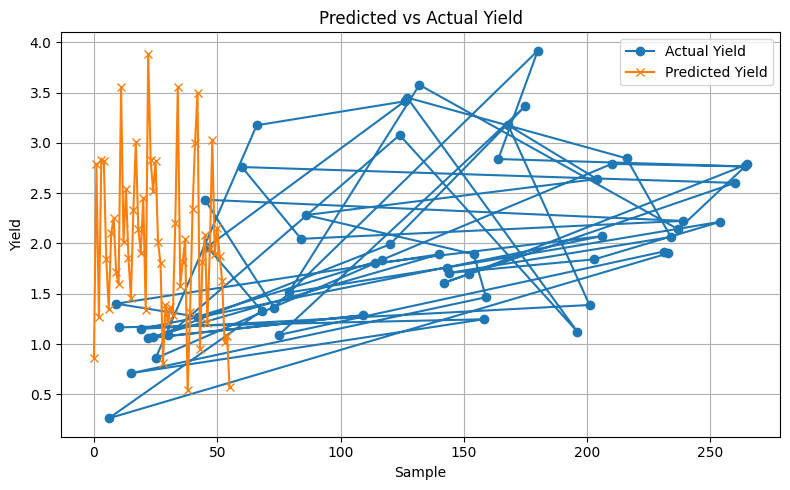

In [ ]:
# Predict yields on test set
y_pred = model.predict(X_test).flatten()

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.plot(y_test, label='Actual Yield', marker='o')
plt.plot(y_pred, label='Predicted Yield', marker='x')
plt.title('Predicted vs Actual Yield')
plt.xlabel('Sample')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
y_pred = model.predict(X_test).flatten()

import pandas as pd
state_test = test_df['state_name']
year_test = test_df['apy_item_interval_start']


result_df = pd.DataFrame({
    'state_name': state_test,
    'apy_item_interval_start': year_test,
    'actual_yield': y_test,
    'predicted_yield': y_pred
})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


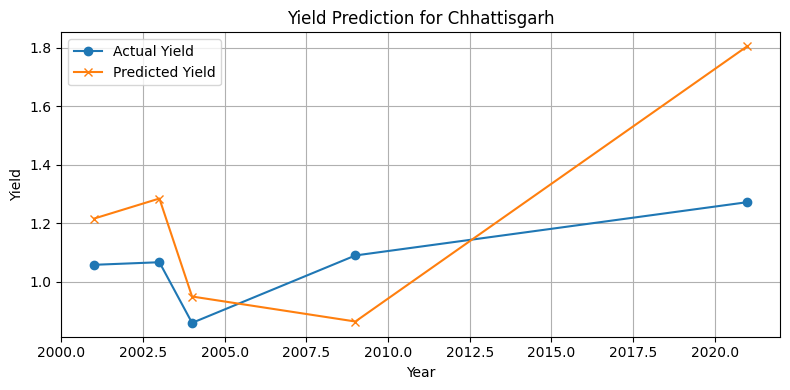

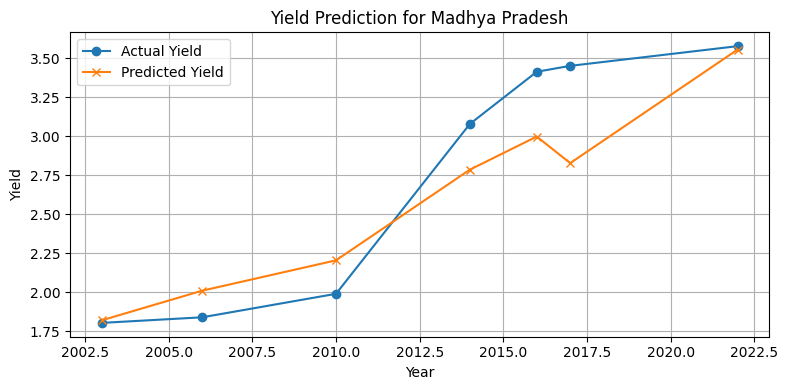

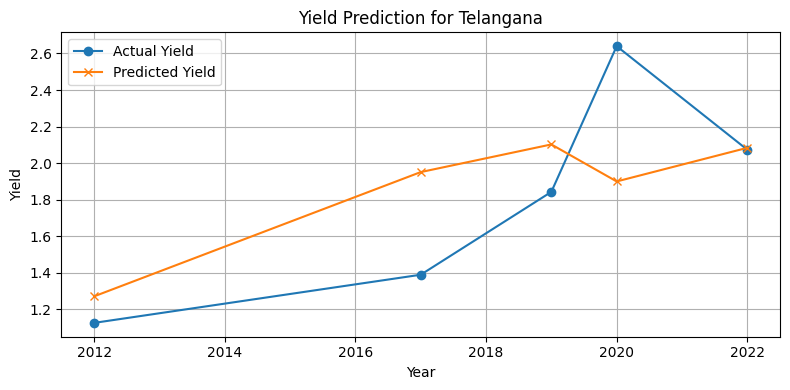

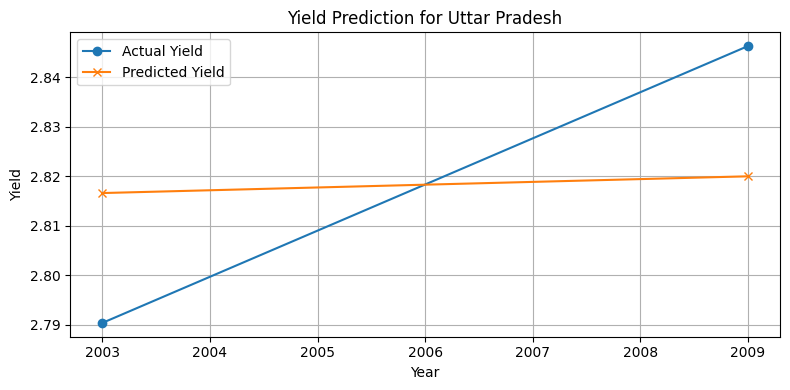

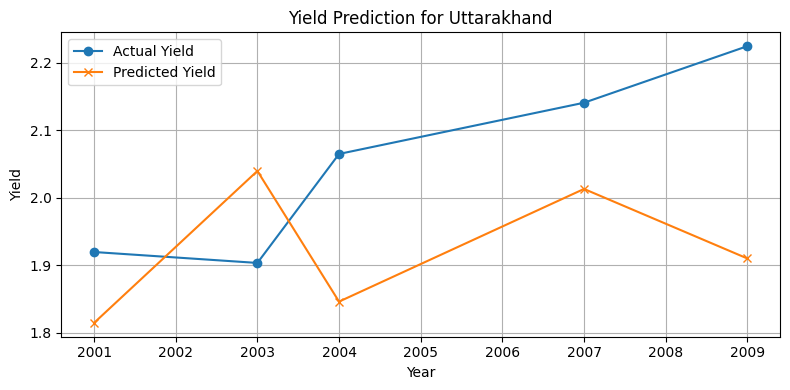

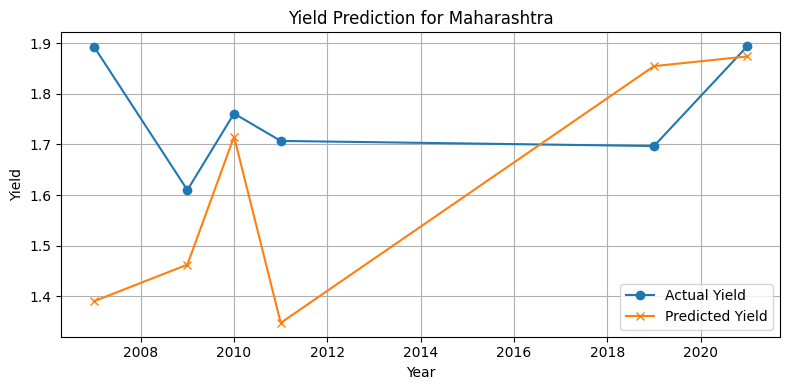

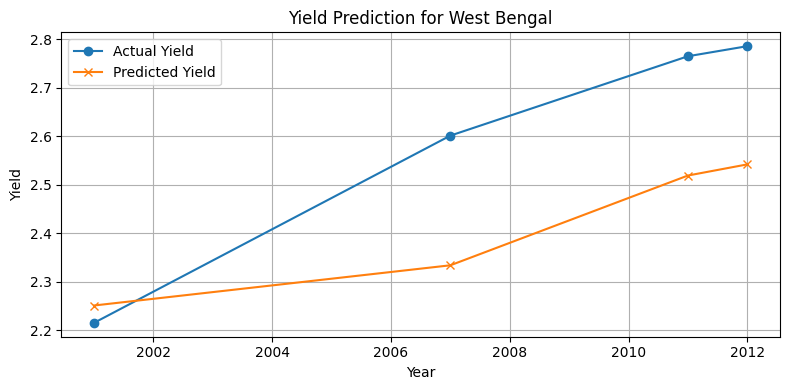

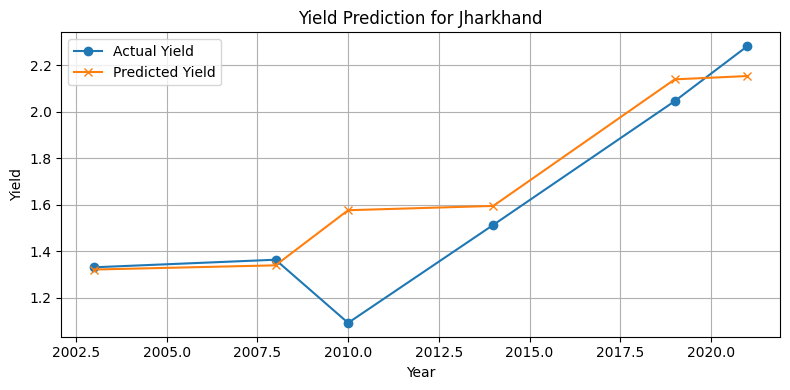

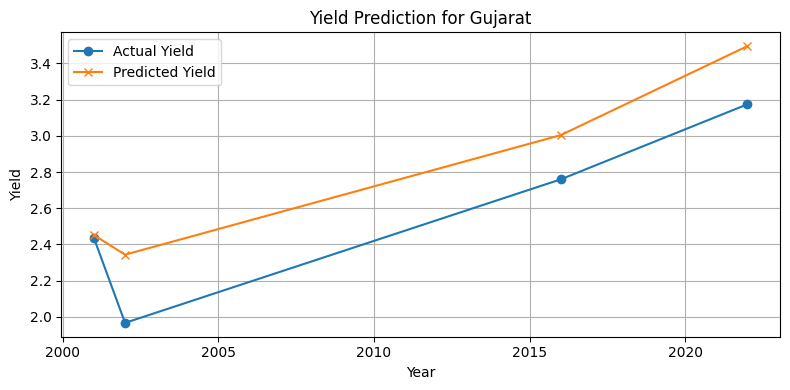

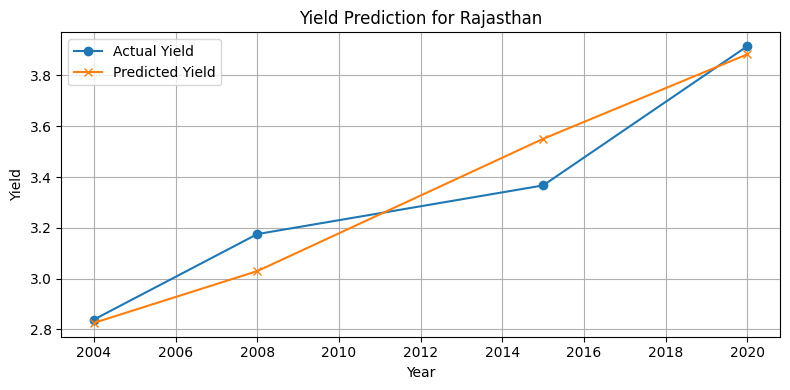

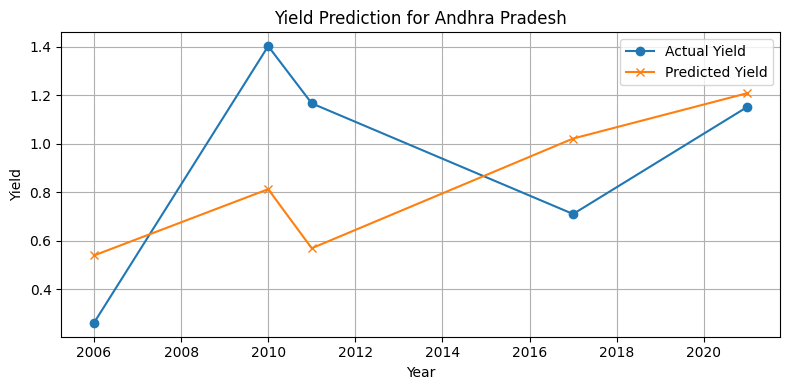

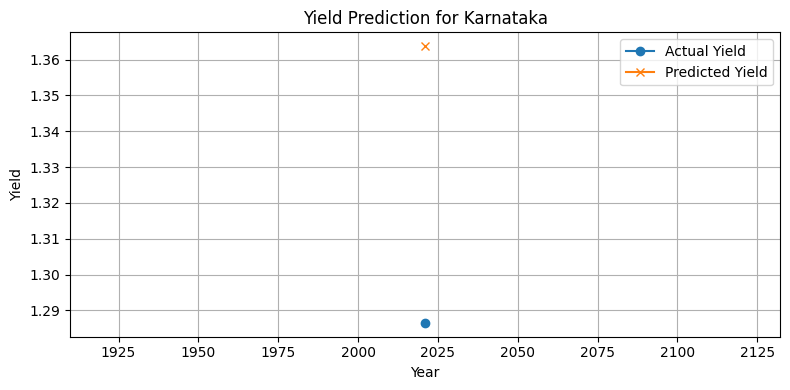

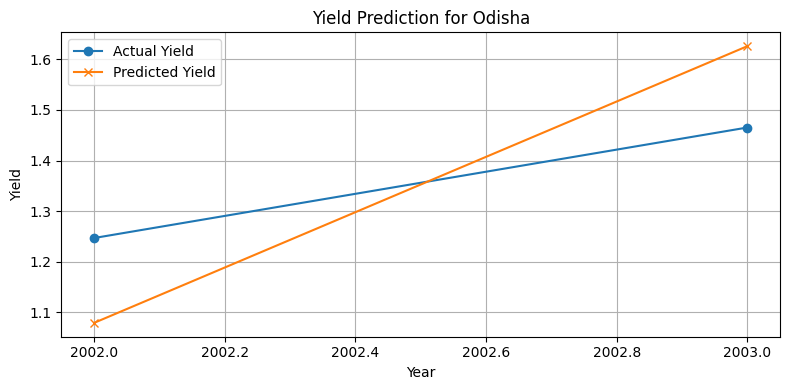

In [ ]:
for state in result_df['state_name'].unique():
    state_df = result_df[result_df['state_name'] == state].sort_values('apy_item_interval_start')
    plt.figure(figsize=(8, 4))
    plt.plot(state_df['apy_item_interval_start'], state_df['actual_yield'], label='Actual Yield', marker='o')
    plt.plot(state_df['apy_item_interval_start'], state_df['predicted_yield'], label='Predicted Yield', marker='x')
    plt.title(f'Yield Prediction for {state}')
    plt.xlabel('Year')
    plt.ylabel('Yield')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
result_df = pd.DataFrame({
    'state_name': state_test,
    'apy_item_interval_start': year_test,
    'actual_yield': y_test,
    'predicted_yield': y_pred
})

In [ ]:
# Round for readability
result_df['actual_yield'] = result_df['actual_yield'].round(2)
result_df['predicted_yield'] = result_df['predicted_yield'].round(2)

# Sort by state and year
result_df = result_df.sort_values(['state_name', 'apy_item_interval_start'])

# Display grouped tables per state
for state in result_df['state_name'].unique():
    print(f"\nYield Comparison for {state}")
    display(result_df[result_df['state_name'] == state][
        ['apy_item_interval_start', 'actual_yield', 'predicted_yield']
    ])


Yield Comparison for Andhra Pradesh


,apy_item_interval_start,actual_yield,predicted_yield
6,2006.0,0.26,0.54
9,2010.0,1.40,0.81
10,2011.0,1.17,0.57
15,2017.0,0.71,1.02
19,2021.0,1.15,1.21



Yield Comparison for Chhattisgarh


,apy_item_interval_start,actual_yield,predicted_yield
22,2001.0,1.06,1.22
24,2003.0,1.07,1.28
25,2004.0,0.86,0.95
30,2009.0,1.09,0.86
42,2021.0,1.27,1.81



Yield Comparison for Gujarat


,apy_item_interval_start,actual_yield,predicted_yield
45,2001.0,2.44,2.45
46,2002.0,1.97,2.34
60,2016.0,2.76,3.00
66,2022.0,3.17,3.50



Yield Comparison for Jharkhand


,apy_item_interval_start,actual_yield,predicted_yield
68,2003.0,1.33,1.32
73,2008.0,1.36,1.34
75,2010.0,1.09,1.58
79,2014.0,1.51,1.59
84,2019.0,2.05,2.14
86,2021.0,2.28,2.15



Yield Comparison for Karnataka


,apy_item_interval_start,actual_yield,predicted_yield
109,2021.0,1.29,1.36



Yield Comparison for Madhya Pradesh


,apy_item_interval_start,actual_yield,predicted_yield
114,2003.0,1.80,1.82
117,2006.0,1.84,2.01
120,2010.0,1.99,2.20
124,2014.0,3.08,2.78
126,2016.0,3.41,3.00
127,2017.0,3.45,2.83
132,2022.0,3.58,3.55



Yield Comparison for Maharashtra


,apy_item_interval_start,actual_yield,predicted_yield
140,2007.0,1.89,1.39
142,2009.0,1.61,1.46
143,2010.0,1.76,1.72
144,2011.0,1.71,1.35
152,2019.0,1.70,1.85
154,2021.0,1.89,1.87



Yield Comparison for Odisha


,apy_item_interval_start,actual_yield,predicted_yield
158,2002.0,1.25,1.08
159,2003.0,1.47,1.63



Yield Comparison for Rajasthan


,apy_item_interval_start,actual_yield,predicted_yield
164,2004.0,2.84,2.83
168,2008.0,3.18,3.03
175,2015.0,3.37,3.55
180,2020.0,3.92,3.88



Yield Comparison for Telangana


,apy_item_interval_start,actual_yield,predicted_yield
196,2012.0,1.12,1.27
201,2017.0,1.39,1.95
203,2019.0,1.84,2.10
204,2020.0,2.64,1.90
206,2022.0,2.07,2.08



Yield Comparison for Uttar Pradesh


,apy_item_interval_start,actual_yield,predicted_yield
210,2003.0,2.79,2.82
216,2009.0,2.85,2.82



Yield Comparison for Uttarakhand


,apy_item_interval_start,actual_yield,predicted_yield
231,2001.0,1.92,1.81
233,2003.0,1.90,2.04
234,2004.0,2.06,1.85
237,2007.0,2.14,2.01
239,2009.0,2.22,1.91



Yield Comparison for West Bengal


,apy_item_interval_start,actual_yield,predicted_yield
254,2001.0,2.22,2.25
260,2007.0,2.60,2.33
264,2011.0,2.77,2.52
265,2012.0,2.79,2.54
